# Data Access

In [1]:
# Single import for everything you need
from src.notebook_setup import *
from src.preprocessing.data_preprocessor import *
# Initialize everything and get your database connection
# mimicdf = setup()
# ed_data = mimicdf.ed_data()

ed_data = pd.read_csv('ed_data.csv')

## Data Quality Assessment

In [2]:

# Basic Statistics
ed_data.describe().T


count          mean           std         min         25%  \
subject_id   425087.0  1.500871e+07  2.878486e+06  10000032.0  12517890.5   
stay_id      425087.0  3.499735e+07  2.888342e+06  30000012.0  32497991.5   
age_at_ed    425087.0  5.286284e+01  2.061934e+01        18.0        35.0   
hour         425087.0  1.347827e+01  5.890293e+00         0.0        10.0   
minute       425087.0  2.941584e+01  1.730100e+01         0.0        14.0   
temperature  401672.0  9.801505e+01  4.008575e+00         0.1        97.5   
heartrate    407997.0  8.507989e+01  1.804169e+01         1.0        72.0   
resprate     404734.0  1.756552e+01  5.485706e+00         0.0        16.0   
o2sat        404491.0  9.847189e+01  1.704081e+01         0.0        97.0   
sbp          406796.0  1.353954e+02  2.409564e+02         1.0       120.0   
dbp          405996.0  8.126213e+01  1.057220e+03         0.0        68.0   
pain         396971.0  4.330903e+00  3.824590e+00         0.0         0.0   
acuity       418100.0  2.625102e+00  7.080837e-01         1.0         2.0   

                    50%         75%         max  
subject_id   15016278.0  17499003.5  19999987.0  
stay_id      34993947.0  37503868.5  39999965.0  
age_at_ed          53.0        69.0       103.0  
hour               14.0        18.0        23.0  
minute             29.0        44.0        59.0  
temperature        98.0        98.6       986.0  
heartrate          84.0        96.0      1228.0  
resprate           18.0        18.0      1820.0  
o2sat              99.0       100.0      9322.0  
sbp               133.0       148.0    151103.0  
dbp                77.0        87.0    661672.0  
pain                5.0         8.0        10.0  
acuity              3.0         3.0         5.0

## Missingness Analysis

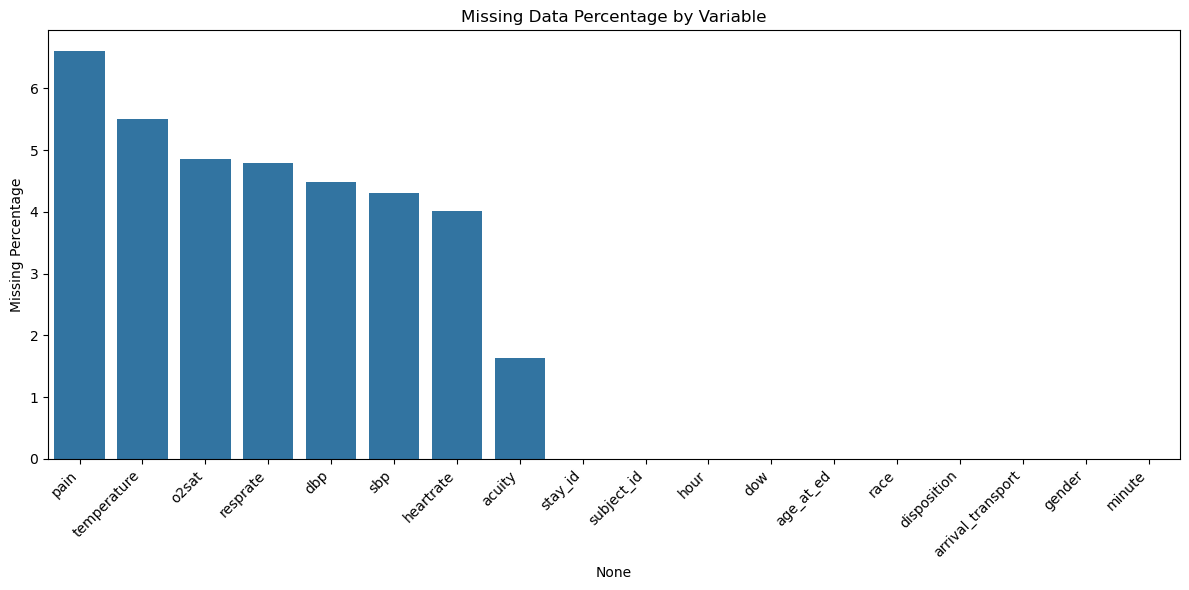

In [3]:
# First explore the data
explorer = DataExplorer(ed_data)
missing_summary = explorer.summarize_missing_data()



Visualization Caption:
Heatmap showing correlations between missing values across features.



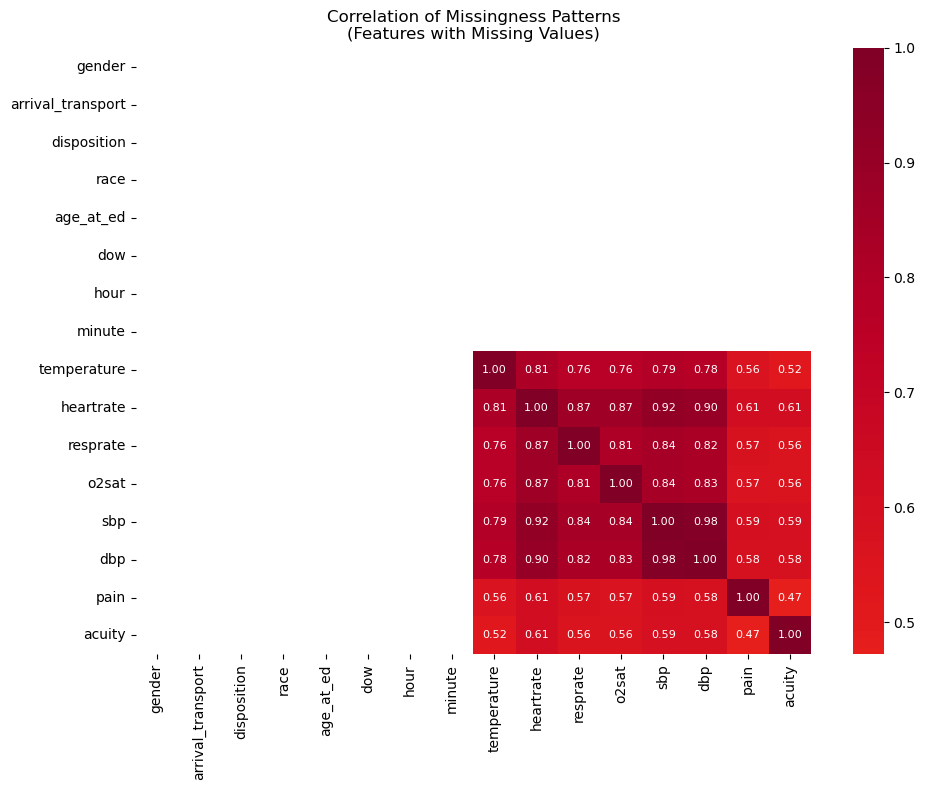

gender  arrival_transport  disposition  race  age_at_ed  \
gender                NaN                NaN          NaN   NaN        NaN   
arrival_transport     NaN                NaN          NaN   NaN        NaN   
disposition           NaN                NaN          NaN   NaN        NaN   
race                  NaN                NaN          NaN   NaN        NaN   
age_at_ed             NaN                NaN          NaN   NaN        NaN   
dow                   NaN                NaN          NaN   NaN        NaN   
hour                  NaN                NaN          NaN   NaN        NaN   
minute                NaN                NaN          NaN   NaN        NaN   
temperature           NaN                NaN          NaN   NaN        NaN   
heartrate             NaN                NaN          NaN   NaN        NaN   
resprate              NaN                NaN          NaN   NaN        NaN   
o2sat                 NaN                NaN          NaN   NaN        NaN   
sbp                   NaN                NaN          NaN   NaN        NaN   
dbp                   NaN                NaN          NaN   NaN        NaN   
pain                  NaN                NaN          NaN   NaN        NaN   
acuity                NaN                NaN          NaN   NaN        NaN   

                   dow  hour  minute  temperature  heartrate  resprate  \
gender             NaN   NaN     NaN          NaN        NaN       NaN   
arrival_transport  NaN   NaN     NaN          NaN        NaN       NaN   
disposition        NaN   NaN     NaN          NaN        NaN       NaN   
race               NaN   NaN     NaN          NaN        NaN       NaN   
age_at_ed          NaN   NaN     NaN          NaN        NaN       NaN   
dow                NaN   NaN     NaN          NaN        NaN       NaN   
hour               NaN   NaN     NaN          NaN        NaN       NaN   
minute             NaN   NaN     NaN          NaN        NaN       NaN   
temperature        NaN   NaN     NaN     1.000000   0.812876  0.763528   
heartrate          NaN   NaN     NaN     0.812876   1.000000  0.870994   
resprate           NaN   NaN     NaN     0.763528   0.870994  1.000000   
o2sat              NaN   NaN     NaN     0.762822   0.872918  0.809723   
sbp                NaN   NaN     NaN     0.792274   0.917976  0.838513   
dbp                NaN   NaN     NaN     0.781235   0.901493  0.824209   
pain               NaN   NaN     NaN     0.564851   0.610935  0.572059   
acuity             NaN   NaN     NaN     0.521633   0.614300  0.560958   

                      o2sat       sbp       dbp      pain    acuity  
gender                  NaN       NaN       NaN       NaN       NaN  
arrival_transport       NaN       NaN       NaN       NaN       NaN  
disposition             NaN       NaN       NaN       NaN       NaN  
race                    NaN       NaN       NaN       NaN       NaN  
age_at_ed               NaN       NaN       NaN       NaN       NaN  
dow                     NaN       NaN       NaN       NaN       NaN  
hour                    NaN       NaN       NaN       NaN       NaN  
minute                  NaN       NaN       NaN       NaN       NaN  
temperature        0.762822  0.792274  0.781235  0.564851  0.521633  
heartrate          0.872918  0.917976  0.901493  0.610935  0.614300  
resprate           0.809723  0.838513  0.824209  0.572059  0.560958  
o2sat              1.000000  0.837881  0.825031  0.568754  0.557117  
sbp                0.837881  1.000000  0.977749  0.593580  0.593321  
dbp                0.825031  0.977749  1.000000  0.584603  0.580154  
pain               0.568754  0.593580  0.584603  1.000000  0.471823  
acuity             0.557117  0.593321  0.580154  0.471823  1.000000

In [4]:
missingness_correlation_matrix = explorer.analyze_missing_correlations()
missingness_correlation_matrix

Strong correlations in vital sign missingness (0.76-0.98) suggest these measurements are typically recorded together during patient assessment. Demographic/administrative data (gender, race, time) show no missing value patterns (NaN), indicating complete recording. Pain and acuity show moderate correlation (0.47-0.61) with vital signs, suggesting somewhat independent collection processes.


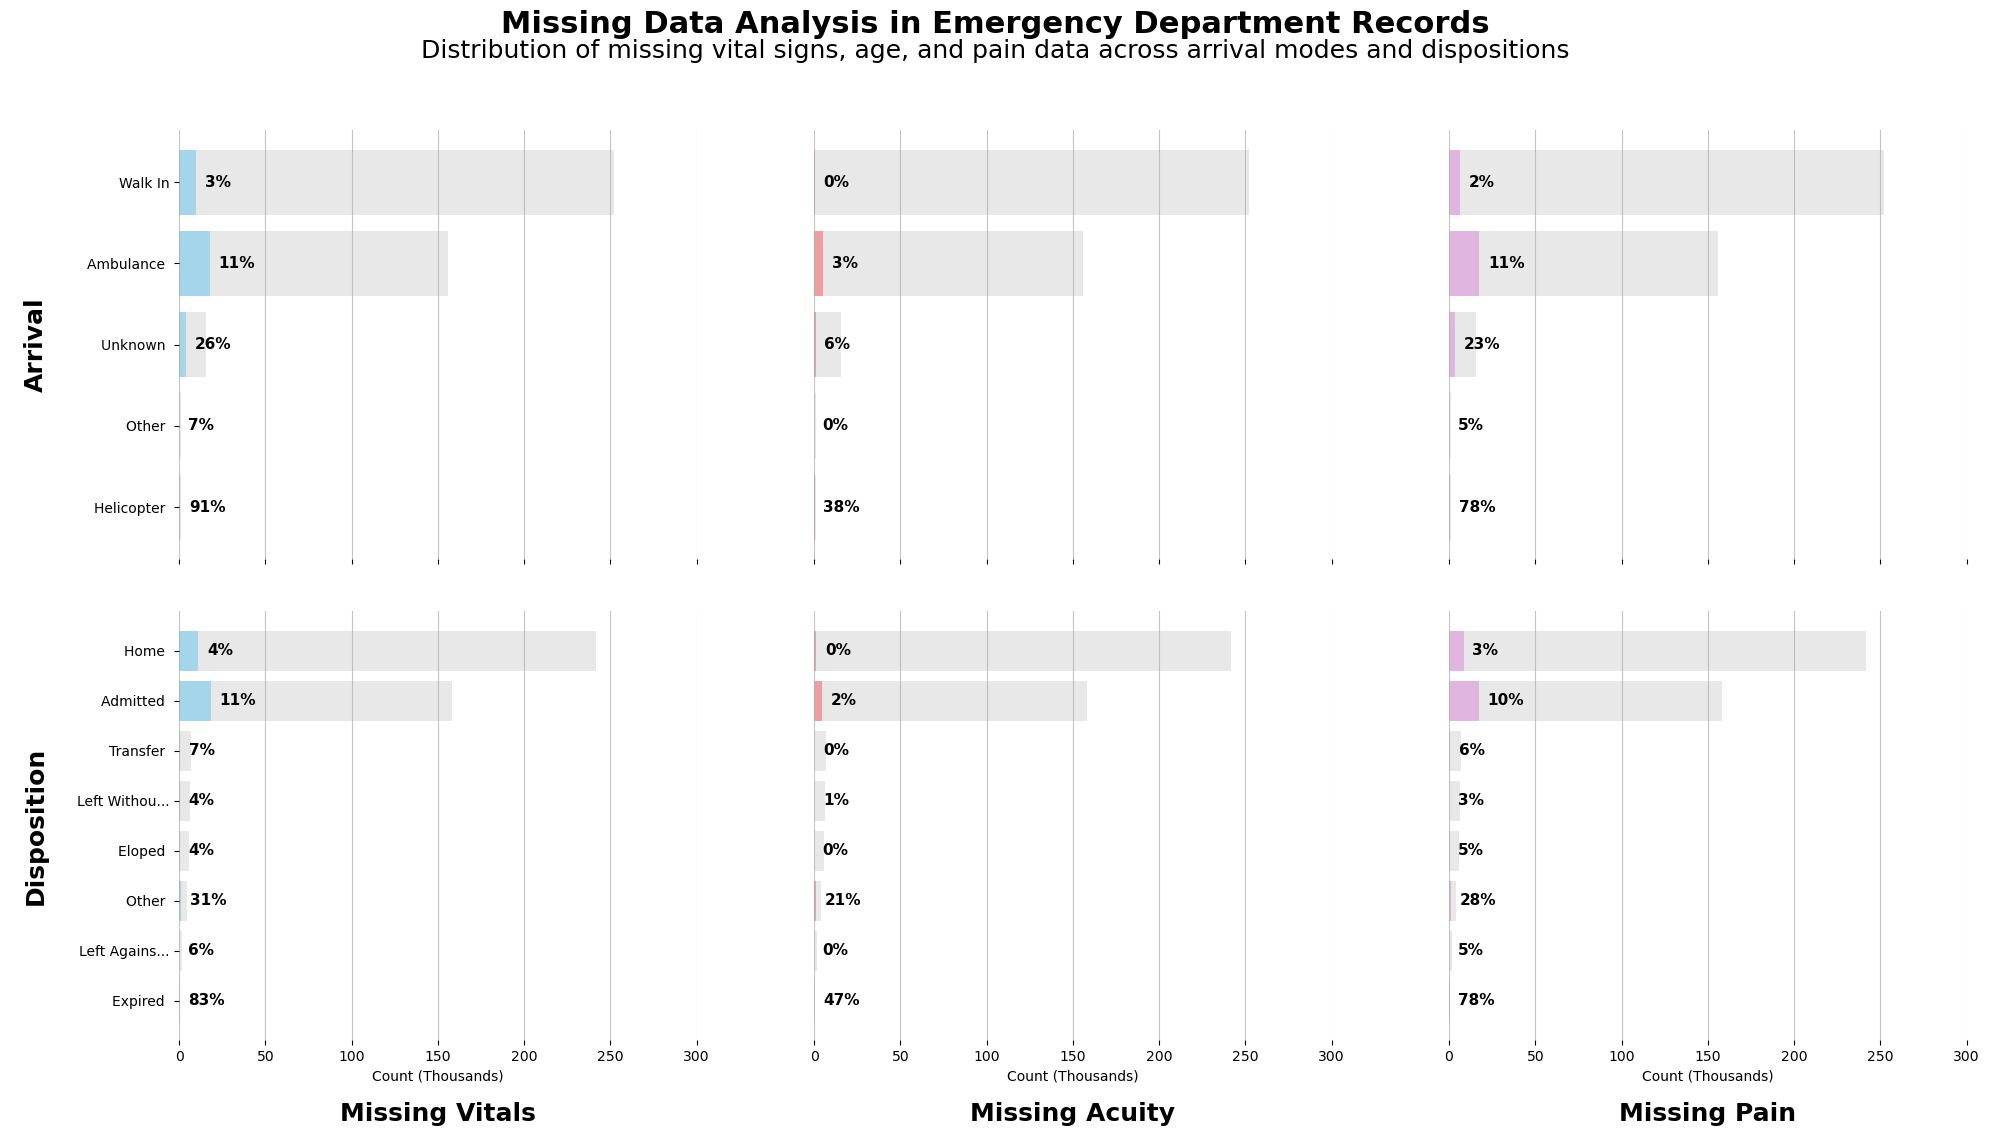

In [5]:
explorer = DataExplorer(ed_data)
explorer.plot_missingness_distribution()

The missingness visualization reveals clear patterns in data quality:
Standard encounters (Walk-in/Ambulance arrivals → Home/Admitted dispositions) show acceptable missingness rates (2-11%), while atypical cases (helicopter arrivals, expired patients) show extreme missingness (40-90%).

Given these patterns and that atypical encounters represent a small fraction of total cases, we will restrict analysis to:
Arrivals: WALK IN, AMBULANCE
Dispositions: HOME, ADMITTED

This approach prioritizes data quality and focuses on typical ED pathways, though introduces some selection bias by excluding edge cases.

In [6]:
# explorer.plot_features_distribution(ed_data)

## Data Preprocessing

In [7]:
# Preprocess ed_data to handle invlaid values
cleaner = DataCleaner(ed_data)
cleaned_data = cleaner.prepare_data()

# plot_features_distribution(cleaned_data)
cleaned_data.describe().T

count          mean           std         min         25%  \
subject_id   425087.0  1.500871e+07  2.878486e+06  10000032.0  12517890.5   
stay_id      425087.0  3.499735e+07  2.888342e+06  30000012.0  32497991.5   
age_at_ed    425087.0  5.286284e+01  2.061934e+01        18.0        35.0   
hour         425087.0  1.347827e+01  5.890293e+00         0.0        10.0   
minute       425087.0  2.941584e+01  1.730100e+01         0.0        14.0   
temperature  401186.0  9.808233e+01  1.009903e+00        56.0        97.5   
heartrate    407980.0  8.506642e+01  1.766277e+01        13.0        72.0   
resprate     404709.0  1.754632e+01  2.356467e+00         1.0        16.0   
o2sat        404352.0  9.839522e+01  2.061225e+00        50.0        97.0   
sbp          405409.0  1.349853e+02  2.229341e+01        10.0       120.0   
dbp          405409.0  7.743832e+01  1.473070e+01         0.0        68.0   
pain         396971.0  4.330903e+00  3.824590e+00         0.0         0.0   
acuity       418100.0  2.625102e+00  7.080837e-01         1.0         2.0   

                    50%         75%         max  
subject_id   15016278.0  17499003.5  19999987.0  
stay_id      34993947.0  37503868.5  39999965.0  
age_at_ed          53.0        69.0       103.0  
hour               14.0        18.0        23.0  
minute             29.0        44.0        59.0  
temperature        98.0        98.6       111.4  
heartrate          84.0        96.0       250.0  
resprate           18.0        18.0        97.0  
o2sat              99.0       100.0       100.0  
sbp               133.0       148.0       299.0  
dbp                77.0        87.0       215.0  
pain                5.0         8.0        10.0  
acuity              3.0         3.0         5.0

In [8]:
# explorer.plot_features_distribution(cleaned_data)

## Feature Engineering

In [9]:
feature_engineer = FeatureEngineer(cleaned_data)
cleaned_data = feature_engineer.engineer_features()

In [10]:
for set, features in feature_engineer.features.items():
    print(f'Feature set: {set}')
    for feature in features:
        print(f'  - {feature}')
    print()

Feature set: original_numerical
  - age_at_ed
  - temperature
  - heartrate
  - resprate
  - o2sat
  - sbp
  - dbp
  - pain
  - acuity

Feature set: original_categorical
  - gender
  - arrival_transport
  - disposition
  - race
  - dow

Feature set: original_temporal
  - hour
  - minute

Feature set: derived_numerical
  - map
  - pulse_pressure
  - shock_index
  - rate_pressure_product
  - temp_delta
  - week_minutes
  - day_minutes

Feature set: derived_binary
  - is_tachycardic
  - is_bradycardic
  - is_hypoxic
  - is_hypertensive
  - is_hypotensive
  - is_febrile
  - is_hypothermic
  - has_sirs
  - is_daytime

Feature set: derived_categorical
  - hr_category
  - resp_category
  - o2_category
  - sbp_category
  - dbp_category
  - temp_category
  - pain_category
  - age_group
  - acuity_group

Feature set: box_transformed
  - temperature_beta
  - o2sat_ibx
  - shock_index_bx
  - rate_pressure_product_bx
  - resprate_bx
  - pain_bx

Feature set: cyclical_features
  - week_minutes_sin
 

## Standardization

QQ plot prior to transformation


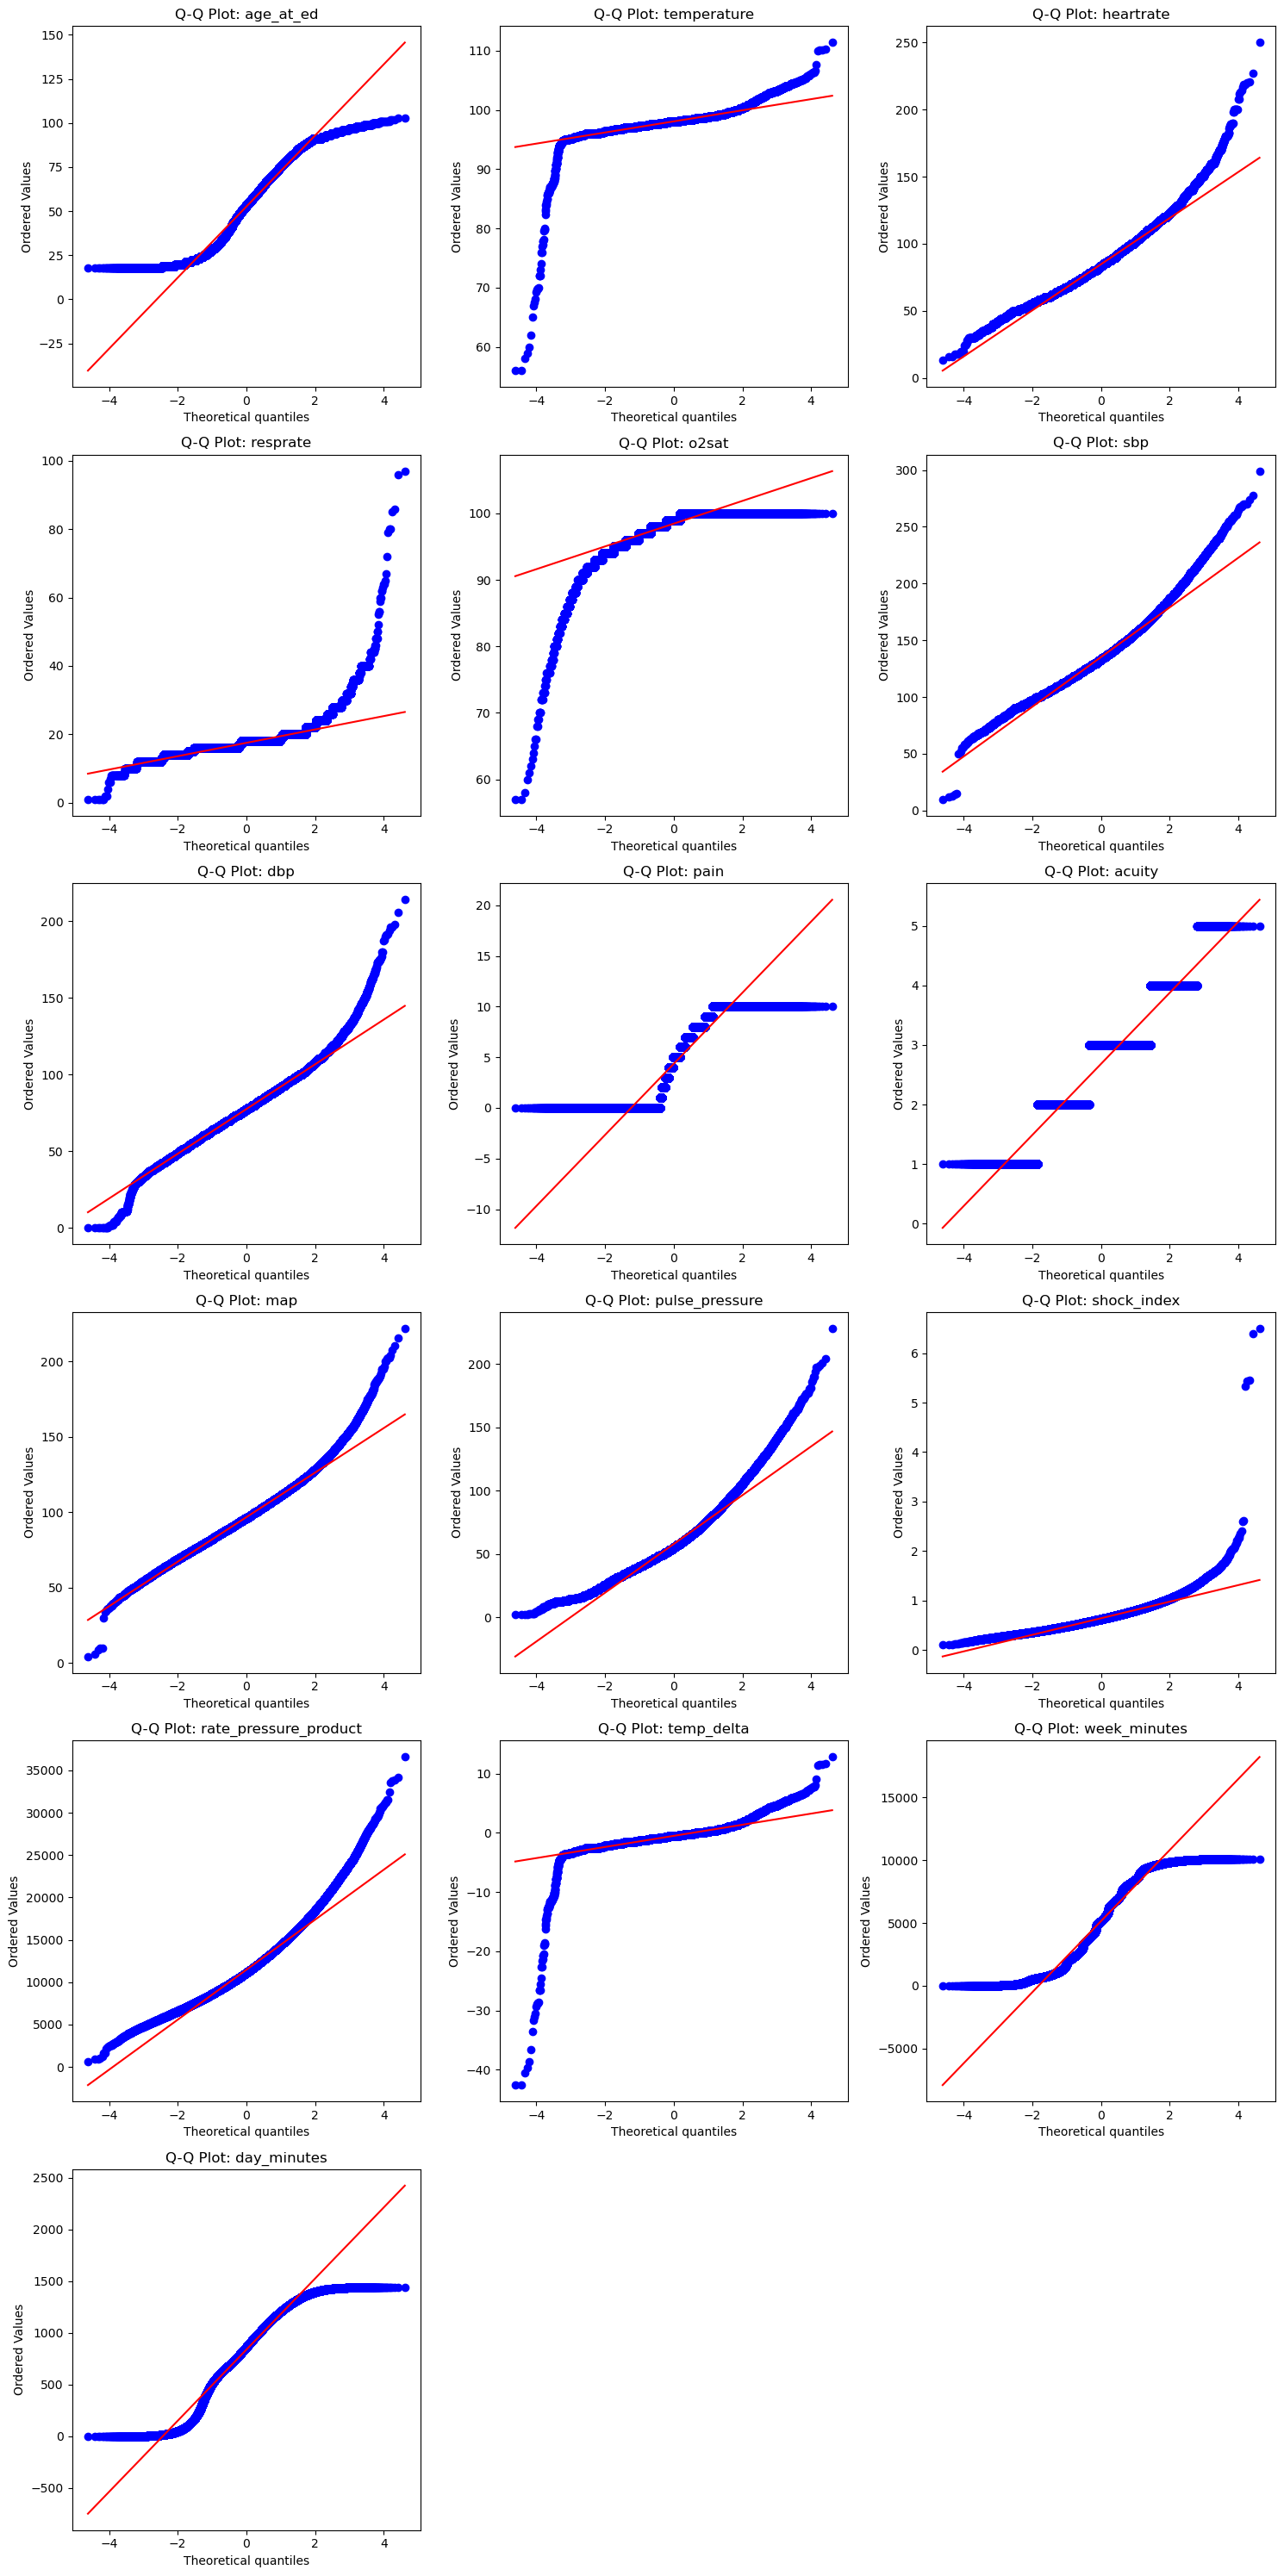

In [11]:
numerical_features = feature_engineer.features['original_numerical'] + feature_engineer.features['derived_numerical']
print('QQ plot prior to transformation')
explorer.plot_qq_plot(cleaned_data.dropna(), numerical_features)



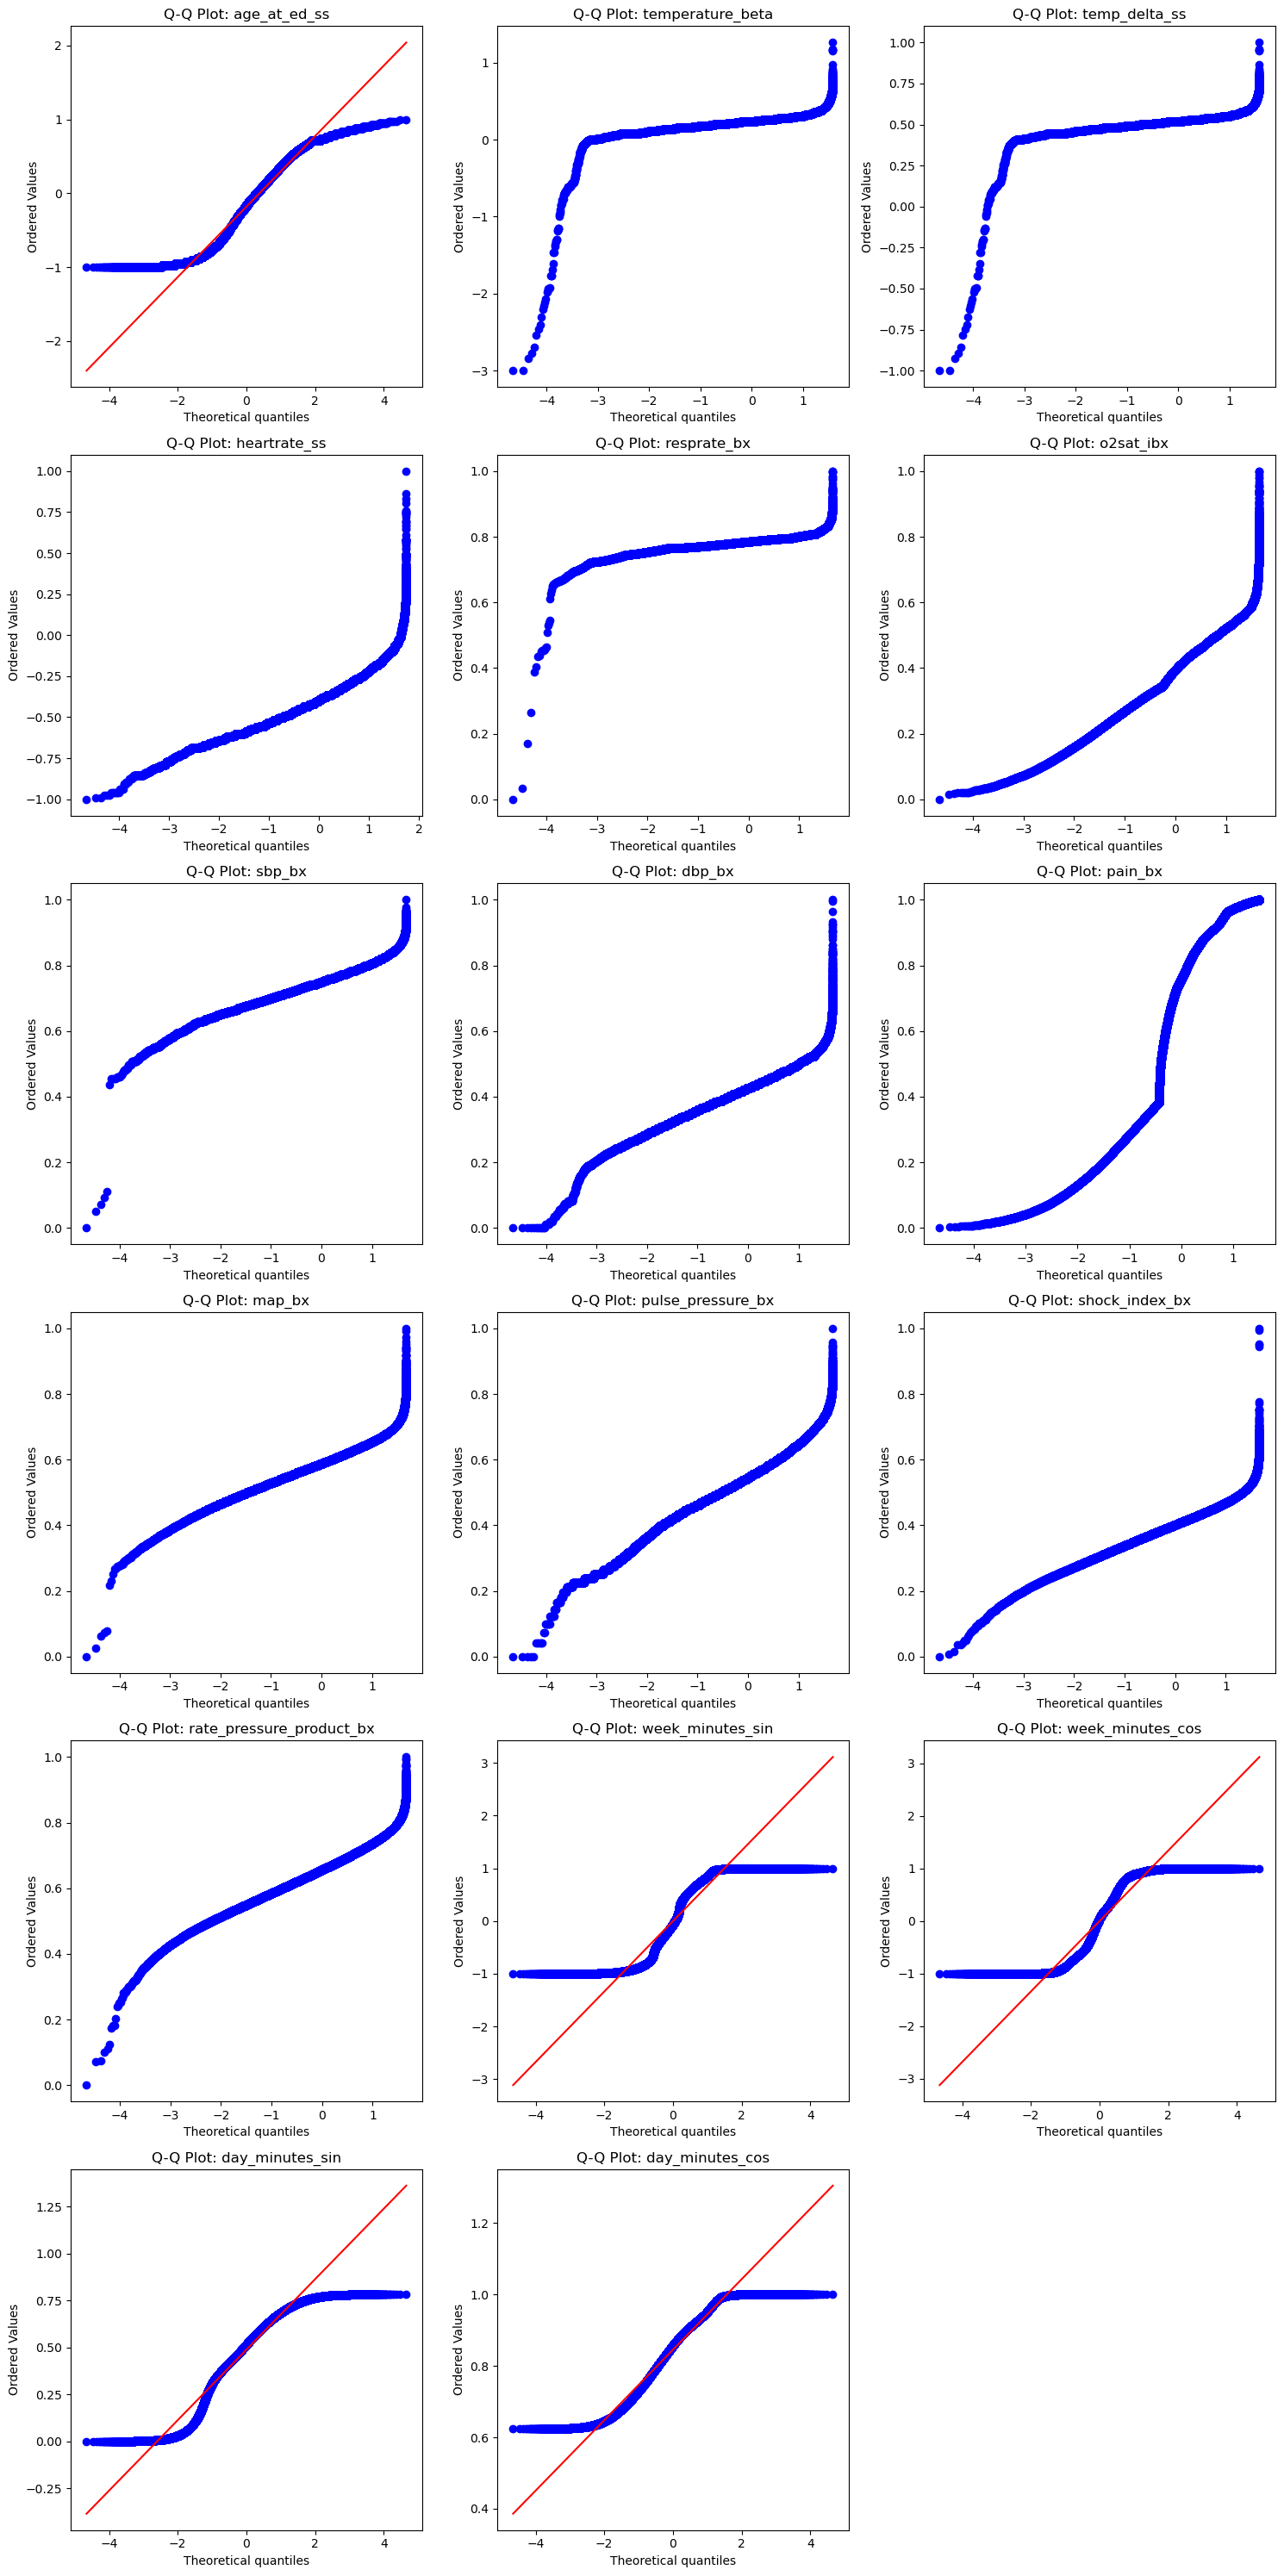

In [12]:
transformer = DataTransformer(cleaned_data)
transformed_data, transformed_features = transformer.fit_transform()
gmm_features = transformer.features['gmm_features']

# print('QQ plot after transformation')
explorer.plot_qq_plot(transformed_data, gmm_features)




In [13]:
transformed_data.describe().T

count             mean             std  \
subject_id                425087.0  15008713.591347   2878486.35271   
stay_id                   425087.0  34997352.518205  2888341.541656   
age_at_ed                 425087.0        52.862845       20.619338   
hour                      425087.0        13.478267        5.890293   
minute                    425087.0        29.415837       17.301001   
temperature               401186.0        98.082329        1.009903   
heartrate                 407980.0         85.06642        17.66277   
resprate                  404709.0        17.546323        2.356467   
o2sat                     404352.0        98.395221        2.061225   
sbp                       405409.0       134.985304       22.293406   
dbp                       405409.0        77.438323       14.730705   
pain                      396971.0         4.330903         3.82459   
acuity                    418100.0         2.625102        0.708084   
map                       405409.0         96.62065       14.989608   
pulse_pressure            405409.0        57.546981       19.631029   
shock_index               404666.0         0.647028        0.174775   
rate_pressure_product     404666.0     11473.829942     3029.274649   
temp_delta                401186.0        -0.517671        1.009903   
is_tachycardic            425087.0         0.168855        0.374624   
is_bradycardic            425087.0         0.047195        0.212056   
is_hypoxic                425087.0         0.007102        0.083974   
is_hypertensive           425087.0         0.344619        0.475244   
is_hypotensive            425087.0         0.007191        0.084497   
is_febrile                425087.0         0.053199        0.224429   
is_hypothermic            425087.0         0.073837        0.261505   
has_sirs                  425087.0         0.332174        0.470994   
is_daytime                425087.0         0.645908        0.478238   
week_minutes              425087.0      5157.715503     2904.600218   
day_minutes               425087.0       838.111845      353.622365   
age_at_ed_ss              425087.0        -0.179698        0.485161   
temperature_beta          401186.0         0.237102        0.077685   
temp_delta_ss             401186.0         0.519218        0.036459   
heartrate_ss              407980.0        -0.391845        0.149053   
sbp_bx                    405409.0         0.747592        0.050153   
dbp_bx                    405409.0          0.42121        0.067958   
pulse_pressure_bx         405409.0         0.542424        0.088492   
map_bx                    405409.0         0.584633        0.060054   
o2sat_ibx                 404352.0         0.382196        0.114202   
shock_index_bx            404666.0          0.39681        0.062105   
rate_pressure_product_bx  404666.0          0.65233        0.070965   
resprate_bx               404709.0         0.784374        0.016949   
pain_bx                   396971.0         0.630364        0.292003   
week_minutes_sin          425087.0        -0.000475        0.706459   
week_minutes_cos          425087.0         0.001263        0.707754   
day_minutes_sin           425087.0         0.487758        0.193373   
day_minutes_cos           425087.0         0.845339          0.1005   

                                 min         25%         50%         75%  \
subject_id                10000032.0  12517890.5  15016278.0  17499003.5   
stay_id                   30000012.0  32497991.5  34993947.0  37503868.5   
age_at_ed                       18.0        35.0        53.0        69.0   
hour                             0.0        10.0        14.0        18.0   
minute                           0.0        14.0        29.0        44.0   
temperature                     56.0        97.5        98.0        98.6   
heartrate                       13.0        72.0        84.0        96.0   
resprate                         1.0        16.0        18.0        18.0   
o2sat  

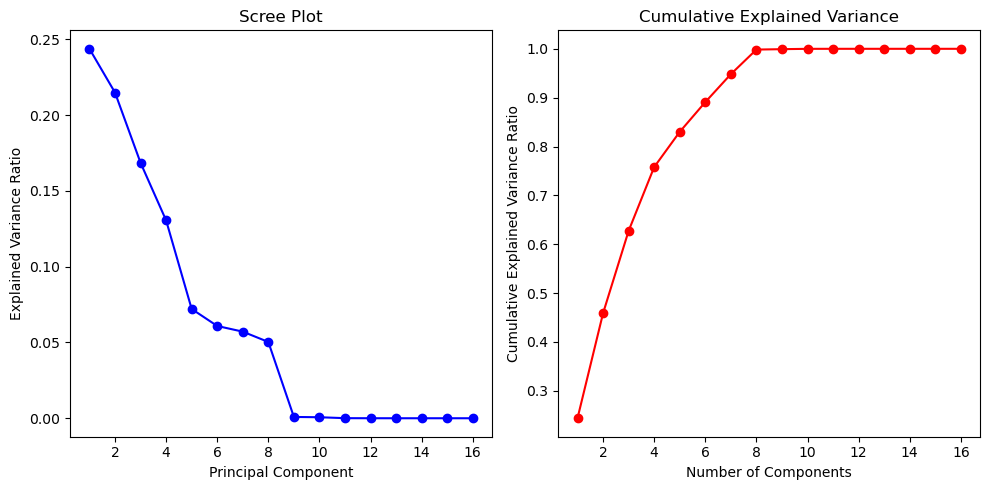


Top 3 features for first 3 principal components:

PC1:
heartrate_ss: 0.423
heartrate: 0.423
shock_index_bx: 0.383

PC2:
sbp_bx: 0.512
map_bx: 0.487
rate_pressure_product_bx: 0.409

PC3:
temp_delta: 0.448
temperature_beta: 0.448
temp_delta_ss: 0.448


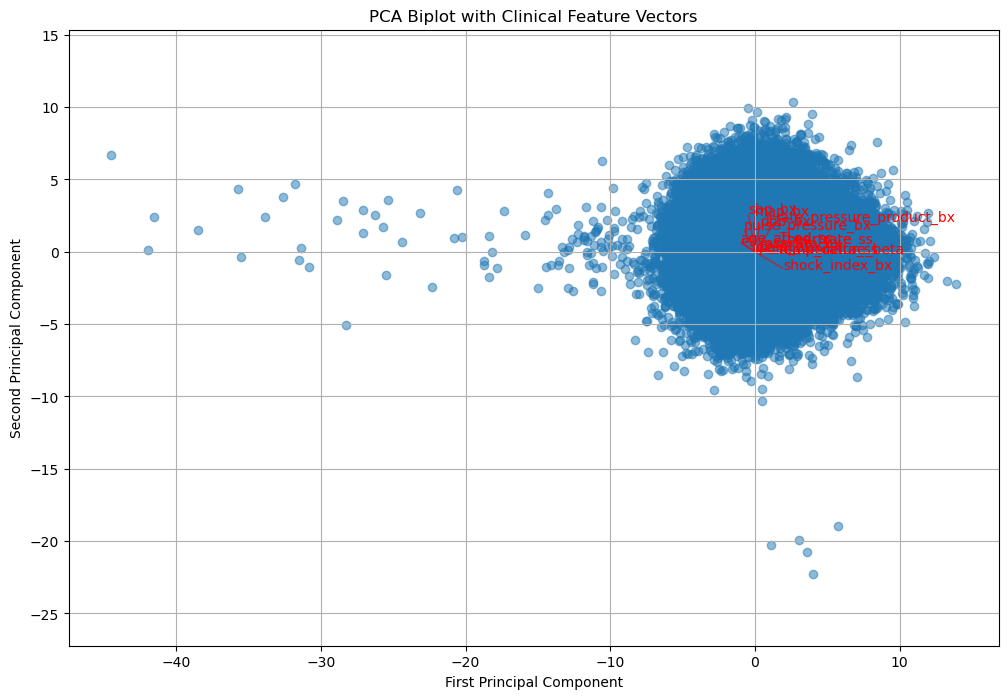

In [14]:
# import PCA
from sklearn.decomposition import PCA
# import standard scaler
from sklearn.preprocessing import StandardScaler

def analyze_pca(transformed_data, transformed_features, n_components=None):
    """
    Perform PCA analysis on transformed data with feature weights and standardization
    """
    # Prepare data - exclude cyclical components
    clinical_features = [f for f in transformed_features 
                        if not (f.endswith('_sin') or f.endswith('_cos'))]
    
    # Add additional numerical features
    additional_features = ['age_at_ed', 'heartrate', 'sbp', 'dbp', 'map', 
                         'pulse_pressure', 'temp_delta']
    
    # Combine all features
    all_features = clinical_features + [f for f in additional_features 
                                      if f not in [f.replace('_bx','').replace('_b','').replace('_ibx','') 
                                                 for f in clinical_features]]
    
    X = transformed_data[all_features].copy()
    X = X.dropna()
    
    # Apply weights to transformed features
    weights = pd.Series(1.0, index=all_features)
    weights['pain_bx'] = 0.25
    weights['o2sat_ibx'] = 0.5
    
    # Apply weights to the data
    X_weighted = X * weights
    
    # Standardize all features
    scaler = StandardScaler()
    X_weighted_scaled = scaler.fit_transform(X_weighted)
    X_weighted_scaled = pd.DataFrame(X_weighted_scaled, columns=all_features)
    
    # Initialize and fit PCA
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(X_weighted_scaled)
    
    # Rest of visualization code remains the same...
    exp_var_ratio = pca.explained_variance_ratio_
    cum_exp_var_ratio = np.cumsum(exp_var_ratio)
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(exp_var_ratio) + 1), exp_var_ratio, 'bo-')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Scree Plot')
    
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(cum_exp_var_ratio) + 1), cum_exp_var_ratio, 'ro-')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.title('Cumulative Explained Variance')
    plt.tight_layout()
    plt.show()
    
    components_df = pd.DataFrame(
        pca.components_.T,
        columns=[f'PC{i+1}' for i in range(pca.n_components_)],
        index=all_features
    )
    
    print("\nTop 3 features for first 3 principal components:")
    for i in range(3):
        pc = f'PC{i+1}'
        print(f"\n{pc}:")
        top_features = components_df[pc].abs().sort_values(ascending=False)[:3]
        for feat, coef in top_features.items():
            print(f"{feat}: {coef:.3f}")
    
    plt.figure(figsize=(12, 8))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
    
    for i, (feature, vec) in enumerate(components_df.iterrows()):
        plt.arrow(0, 0, 
                 vec['PC1'] * 5, vec['PC2'] * 5,
                 color='r', alpha=0.5)
        plt.text(vec['PC1'] * 5.2, vec['PC2'] * 5.2, feature, color='r')
    
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('PCA Biplot with Clinical Feature Vectors')
    plt.grid(True)
    plt.axis('equal')
    plt.show()
    
    return pca, components_df, pca_result

# Use the function
pca, components_df, pca_result = analyze_pca(transformed_data, gmm_features)

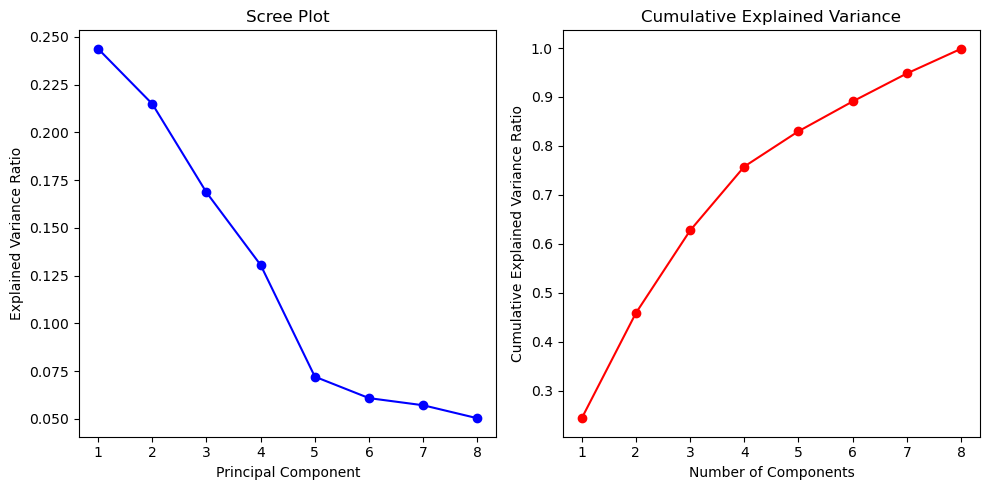


Top 3 features for first 3 principal components:

PC1:
heartrate_ss: 0.423
heartrate: 0.423
shock_index_bx: 0.383

PC2:
sbp_bx: 0.512
map_bx: 0.487
rate_pressure_product_bx: 0.409

PC3:
temp_delta: 0.448
temperature_beta: 0.448
temp_delta_ss: 0.448


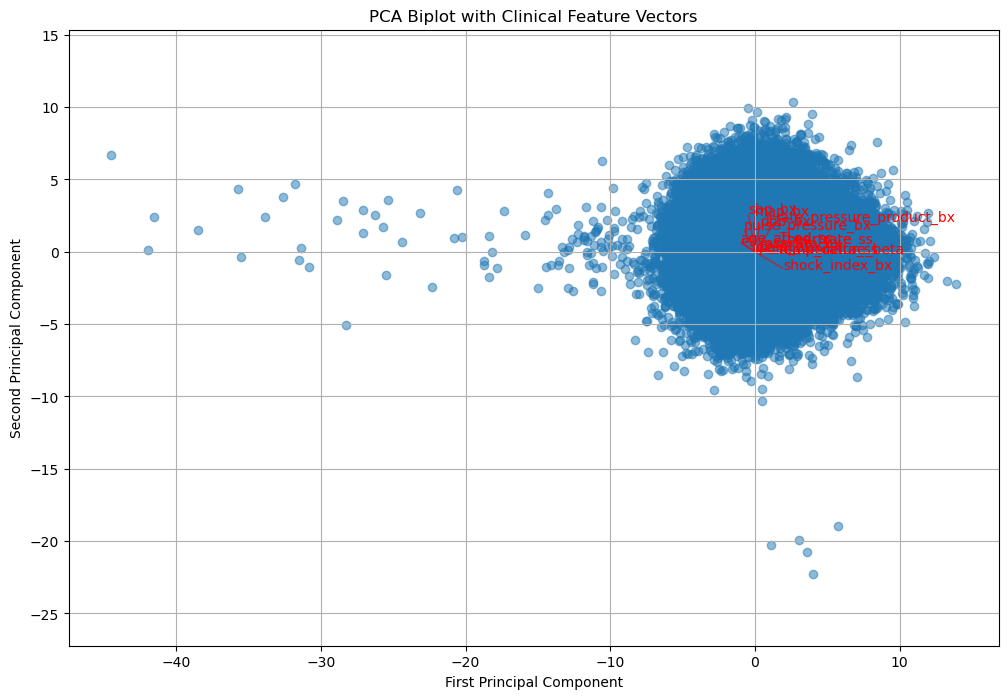


Cluster Sizes:
0     20794
1     66557
2     50969
3    175882
4     64960
Name: count, dtype: int64


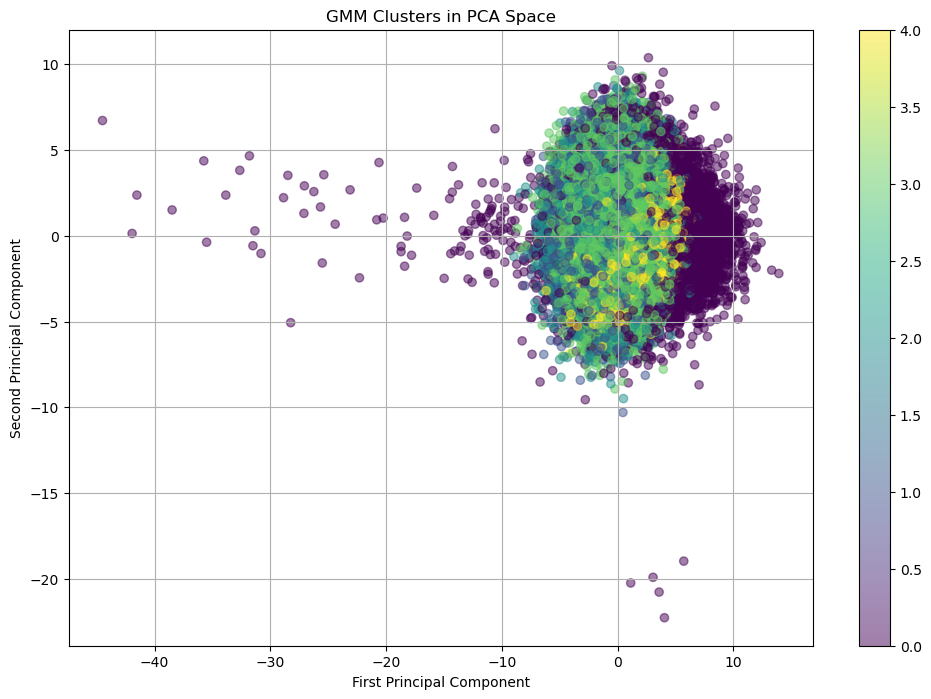


Mean values by cluster:
         age_at_ed_ss  temperature_beta  temp_delta_ss  heartrate_ss  \
cluster                                                                
0           -0.063866          0.329387       0.562528     -0.245610   
1            0.014538          0.226232       0.514116     -0.430044   
2            0.182262          0.227657       0.514785     -0.395551   
3           -0.157222          0.231232       0.516463     -0.400030   
4           -0.833887          0.241994       0.521513     -0.383115   

         resprate_bx  o2sat_ibx    sbp_bx    dbp_bx   pain_bx    map_bx  \
cluster                                                                   
0           0.799858   0.421547  0.743039  0.417542  0.616803  0.579651   
1           0.783718   0.331425  0.754257  0.421205  0.336712  0.588735   
2           0.784119   0.494565  0.748743  0.412928  0.268357  0.580651   
3           0.783754   0.377371  0.751951  0.429850  0.868837  0.592224   
4           0.780413

In [15]:
# import GaussianMixture
from sklearn.mixture import GaussianMixture

def cluster_pca_data(transformed_data, transformed_features, n_components=8, n_clusters=5, sample_size=10000):
    """
    Perform PCA dimensionality reduction followed by GMM clustering on a sample
    """
    # Prepare features
    clinical_features = [f for f in transformed_features 
                        if not (f.endswith('_sin') or f.endswith('_cos'))]
    additional_features = ['age_at_ed', 'heartrate', 'sbp', 'dbp', 'map', 
                         'pulse_pressure', 'temp_delta']
    all_features = clinical_features + [f for f in additional_features 
                                      if f not in [f.replace('_bx','').replace('_b','').replace('_ibx','') 
                                                 for f in clinical_features]]
    
    # Create complete dataset and handle missing values first
    data_complete = transformed_data[all_features].copy()
    data_complete = data_complete.dropna()  # Remove rows with any missing values
    
    # Now perform PCA on complete data
    pca, _, pca_result = analyze_pca(data_complete, transformed_features, n_components=n_components)
    
    # Take a sample for GMM training
    np.random.seed(42)
    sample_indices = np.random.choice(len(pca_result), sample_size, replace=False)
    pca_sample = pca_result[sample_indices]
    
    # Initialize and fit GMM on sample
    gmm = GaussianMixture(n_components=n_clusters, 
                         random_state=42,
                         n_init=10)
    gmm.fit(pca_sample)
    
    # Predict clusters for all complete data
    clusters = gmm.predict(pca_result)
    
    # Create results DataFrame from complete data
    results_df = data_complete.copy()
    results_df['cluster'] = clusters
    
    # Add PCA components
    for i in range(n_components):
        results_df[f'PC{i+1}'] = pca_result[:, i]
    
    # Analyze clusters
    print("\nCluster Sizes:")
    print(pd.Series(clusters).value_counts().sort_index())
    
    # Plot cluster distributions in first two PCs
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], 
                         c=clusters, cmap='viridis', alpha=0.5)
    plt.colorbar(scatter)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('GMM Clusters in PCA Space')
    plt.grid(True)
    plt.show()
    
    # Feature distributions by cluster
    print("\nMean values by cluster:")
    cluster_means = results_df.groupby('cluster')[all_features].mean()
    print(cluster_means)
    
    return results_df, pca, gmm

# Use the function
results_df, pca, gmm = cluster_pca_data(transformed_data, transformed_features, 
                                       n_components=8, n_clusters=5, 
                                       sample_size=10000)

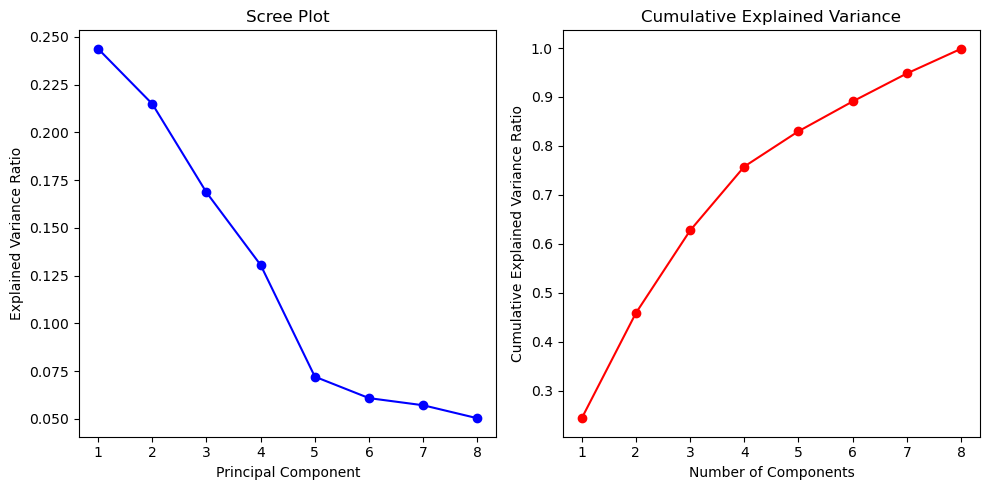


Top 3 features for first 3 principal components:

PC1:
heartrate_ss: 0.423
heartrate: 0.423
shock_index_bx: 0.383

PC2:
sbp_bx: 0.512
map_bx: 0.487
rate_pressure_product_bx: 0.409

PC3:
temp_delta: 0.448
temperature_beta: 0.448
temp_delta_ss: 0.448


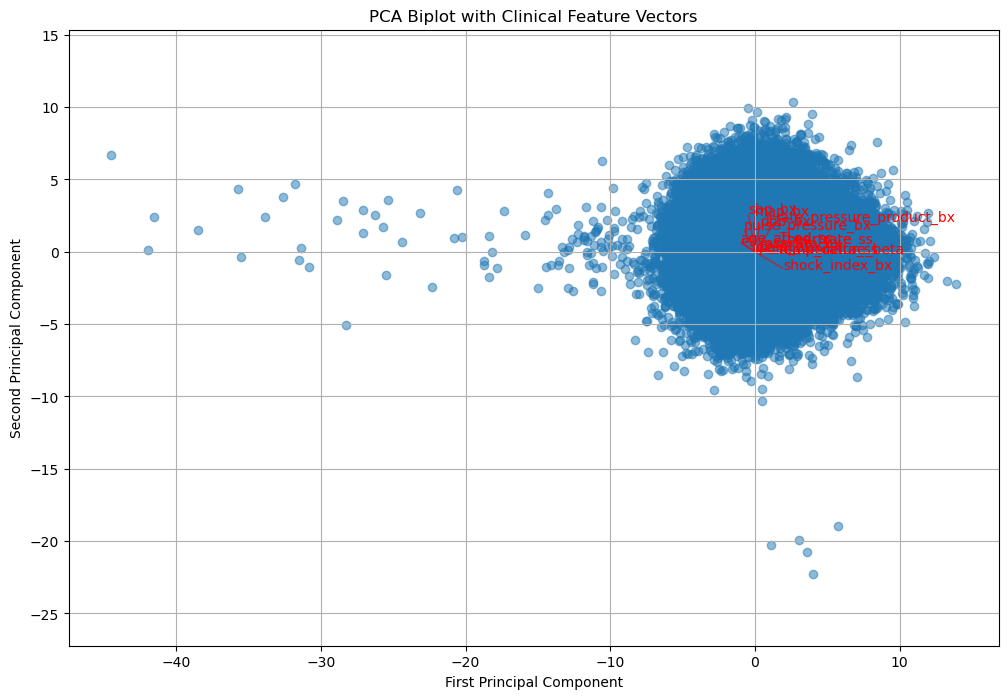


KMeans Cluster Sizes:
0     35605
1     87366
2     68829
3     83837
4    103525
Name: count, dtype: int64


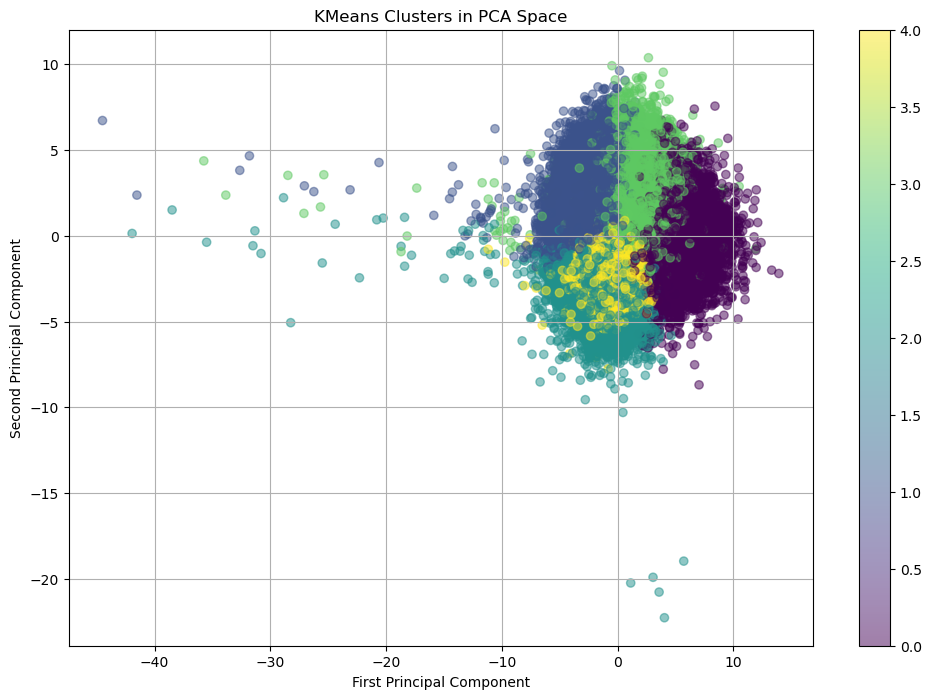


KMeans Mean values by cluster:
         age_at_ed_ss  temperature_beta  temp_delta_ss  heartrate_ss  \
cluster                                                                
0           -0.277843          0.374762       0.583823     -0.241972   
1            0.177634          0.221426       0.511860     -0.488656   
2            0.207462          0.218813       0.510634     -0.441511   
3           -0.327702          0.218418       0.510449     -0.244980   
4           -0.631007          0.230272       0.516012     -0.453042   

         resprate_bx  o2sat_ibx    sbp_bx    dbp_bx   pain_bx    map_bx  \
cluster                                                                   
0           0.788088   0.401738  0.734494  0.407724  0.667938  0.568992   
1           0.784021   0.389854  0.798285  0.439047  0.605020  0.625721   
2           0.785428   0.430482  0.703828  0.360214  0.535435  0.523284   
3           0.786720   0.380740  0.768091  0.470652  0.651604  0.624696   
4           0

In [18]:
def train_kmeans_from_gmm(transformed_data, transformed_features, gmm, n_components=8, n_clusters=5):
    """
    Train KMeans using GMM cluster centers as initial centroids
    """
    # Prepare features
    clinical_features = [f for f in transformed_features 
                        if not (f.endswith('_sin') or f.endswith('_cos'))]
    additional_features = ['age_at_ed', 'heartrate', 'sbp', 'dbp', 'map', 
                         'pulse_pressure', 'temp_delta']
    all_features = clinical_features + [f for f in additional_features 
                                      if f not in [f.replace('_bx','').replace('_b','').replace('_ibx','') 
                                                 for f in clinical_features]]
    
    # Create complete dataset
    data_complete = transformed_data[all_features].copy()
    data_complete = data_complete.dropna()
    
    # Get PCA transformation
    pca, _, pca_result = analyze_pca(data_complete, transformed_features, n_components=n_components)
    
    # Initialize KMeans with GMM centers
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=n_clusters, 
                    init=gmm.means_,  # Use GMM centers
                    n_init=1,  # Since we're providing initial centers
                    random_state=42)
    
    # Fit KMeans
    clusters = kmeans.fit_predict(pca_result)
    
    # Create results DataFrame
    results_df = data_complete.copy()
    results_df['cluster'] = clusters
    
    # Add PCA components
    for i in range(n_components):
        results_df[f'PC{i+1}'] = pca_result[:, i]
    
    # Analyze clusters
    print("\nKMeans Cluster Sizes:")
    print(pd.Series(clusters).value_counts().sort_index())
    
    # Plot cluster distributions
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], 
                         c=clusters, cmap='viridis', alpha=0.5)
    plt.colorbar(scatter)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('KMeans Clusters in PCA Space')
    plt.grid(True)
    plt.show()
    
    # Feature distributions by cluster
    print("\nKMeans Mean values by cluster:")
    cluster_means = results_df.groupby('cluster')[all_features].mean()
    print(cluster_means)
    
    return results_df, kmeans

# Use the function
kmeans_results, kmeans_model = train_kmeans_from_gmm(transformed_data, gmm_features, 
                                                    gmm, n_components=8, n_clusters=5)

K=6, Silhouette Score: 0.108
K=7, Silhouette Score: 0.111
K=8, Silhouette Score: 0.116
K=9, Silhouette Score: 0.115
K=10, Silhouette Score: 0.110


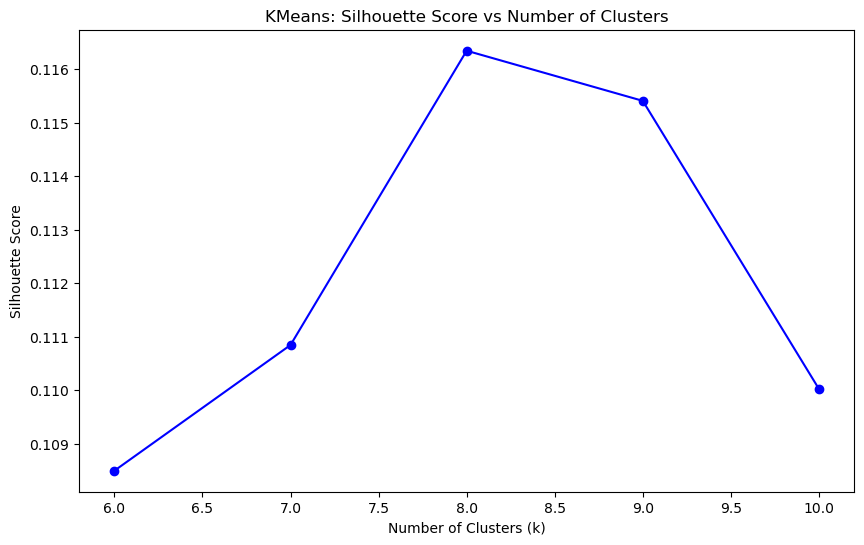

Components=6, BIC Score: 11791
Components=7, BIC Score: 41446
Components=8, BIC Score: 41449
Components=9, BIC Score: 376
Components=10, BIC Score: -31907


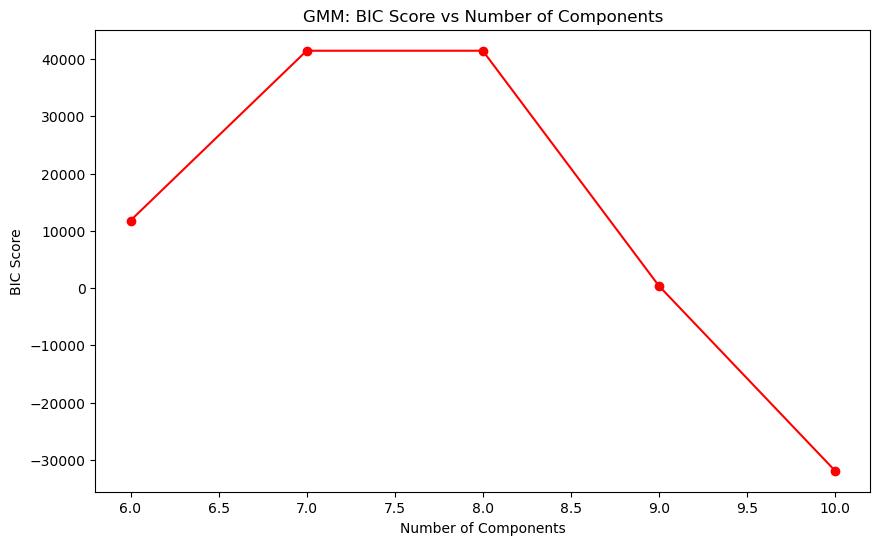


Optimal K for KMeans: 8
Optimal K for GMM: 10

KMeans cluster sizes:
0    3165
1    1785
2    2707
3    3077
4    1189
5    4436
6    3101
7     540
Name: count, dtype: int64

GMM cluster sizes:
0     817
1     290
2    5867
3    1898
4    2118
5    3676
6      88
7     690
8    2602
9    1954
Name: count, dtype: int64


In [16]:
# import GaussianMixture
from sklearn.mixture import GaussianMixture

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 

def analyze_clustering(transformed_data, n_samples=20000):
    """
    Analyze both GMM and KMeans clustering with larger sample and original features
    """
    # Select key features (using original rather than transformed)
    features = ['age_at_ed', 'heartrate', 'sbp', 'dbp', 'map', 
                'temperature', 'resprate', 'o2sat', 'pain']
    
    # Prepare data
    data_complete = transformed_data[features].copy()
    data_complete = data_complete.dropna()
    
    # Take larger sample
    np.random.seed(42)
    sample_indices = np.random.choice(len(data_complete), n_samples, replace=False)
    sample_data = data_complete.iloc[sample_indices]
    
    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(sample_data)
    
    # Try different numbers of clusters for KMeans
    silhouette_scores = []
    k_range = range(6, 11)
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        clusters = kmeans.fit_predict(X_scaled)
        score = silhouette_score(X_scaled, clusters)
        silhouette_scores.append(score)
        print(f"K={k}, Silhouette Score: {score:.3f}")
    
    # Plot silhouette scores
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, silhouette_scores, 'bo-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('KMeans: Silhouette Score vs Number of Clusters')
    plt.show()
    
    # Try GMM with different components
    bic_scores = []
    for n_comp in k_range:
        gmm = GaussianMixture(n_components=n_comp, 
                             covariance_type='full', 
                             random_state=42,
                             n_init=10)
        gmm.fit(X_scaled)
        bic_scores.append(gmm.bic(X_scaled))
        print(f"Components={n_comp}, BIC Score: {gmm.bic(X_scaled):.0f}")
    
    # Plot BIC scores
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, bic_scores, 'ro-')
    plt.xlabel('Number of Components')
    plt.ylabel('BIC Score')
    plt.title('GMM: BIC Score vs Number of Components')
    plt.show()
    
    # Fit optimal models
    optimal_k = k_range[np.argmax(silhouette_scores)]
    optimal_gmm_k = k_range[np.argmin(bic_scores)]
    
    print(f"\nOptimal K for KMeans: {optimal_k}")
    print(f"Optimal K for GMM: {optimal_gmm_k}")
    
    # Fit final models
    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    gmm = GaussianMixture(n_components=optimal_gmm_k, 
                         covariance_type='full', 
                         random_state=42,
                         n_init=10)
    
    kmeans_labels = kmeans.fit_predict(X_scaled)
    gmm_labels = gmm.fit_predict(X_scaled)
    
    # Print cluster sizes
    print("\nKMeans cluster sizes:")
    print(pd.Series(kmeans_labels).value_counts().sort_index())
    print("\nGMM cluster sizes:")
    print(pd.Series(gmm_labels).value_counts().sort_index())
    
    return sample_data, kmeans_labels, gmm_labels, kmeans, gmm

# Run the analysis
sample_data, kmeans_labels, gmm_labels, kmeans_model, gmm_model = analyze_clustering(transformed_data, n_samples=20000)

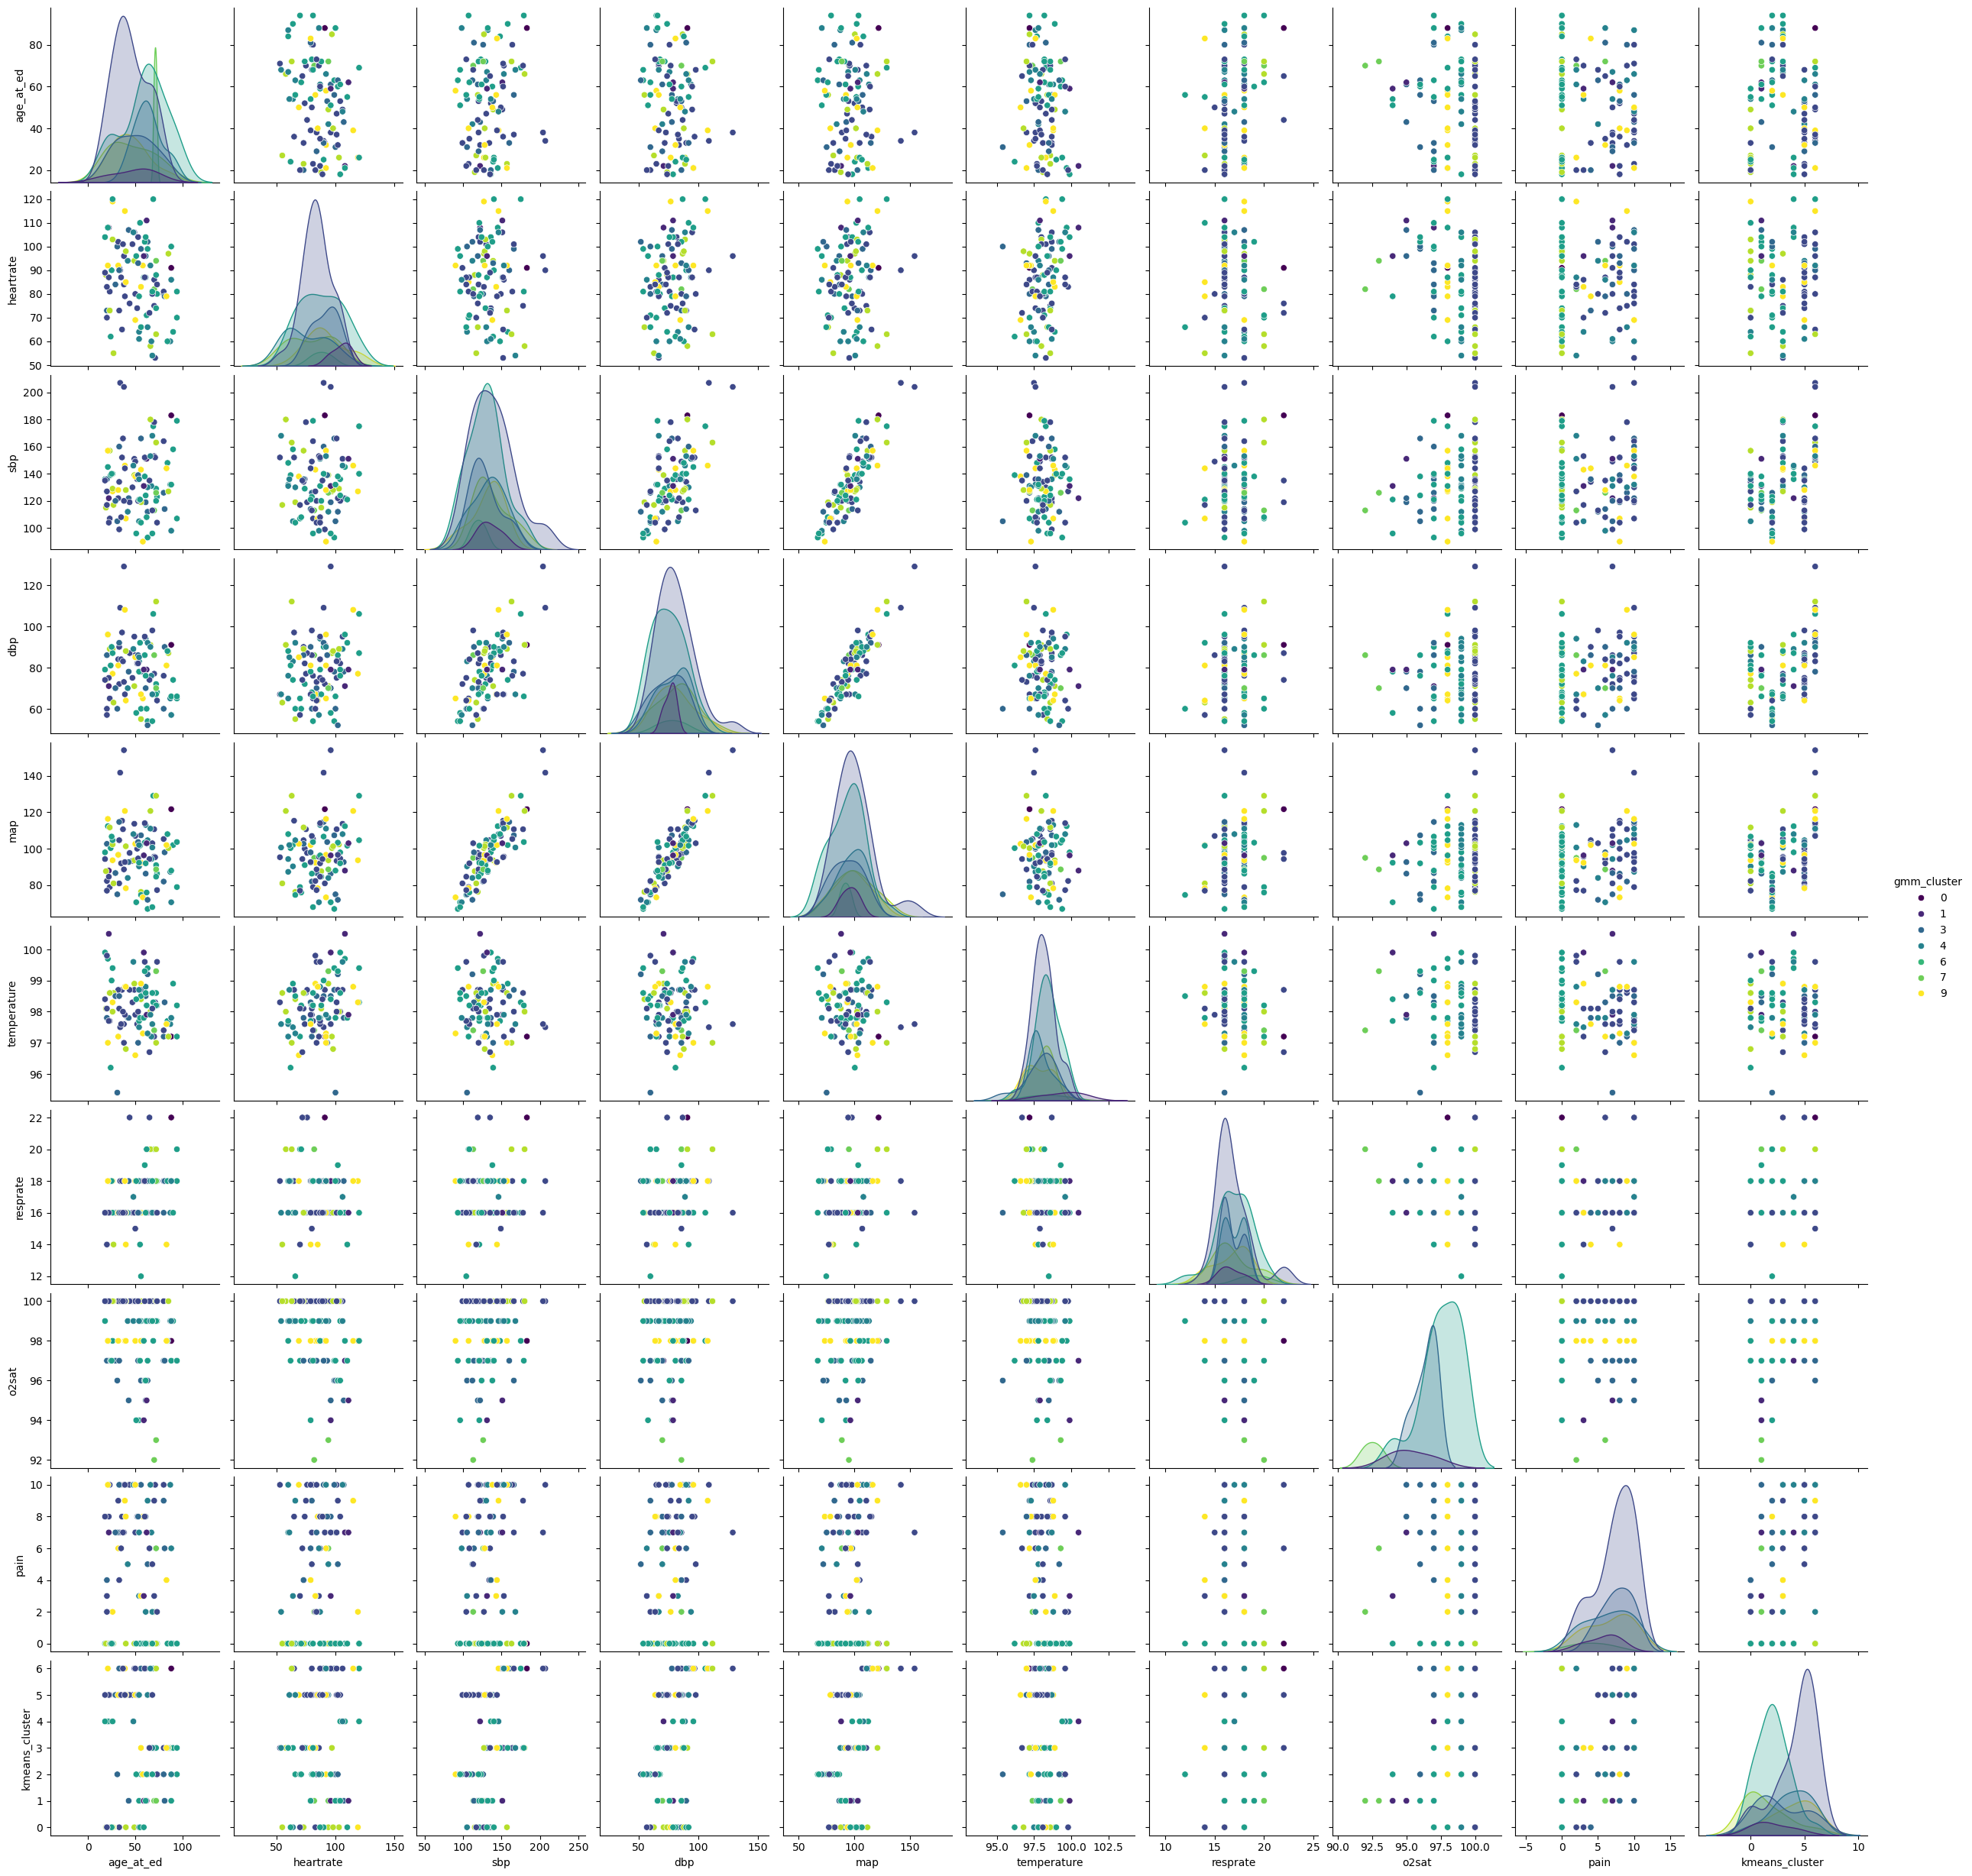

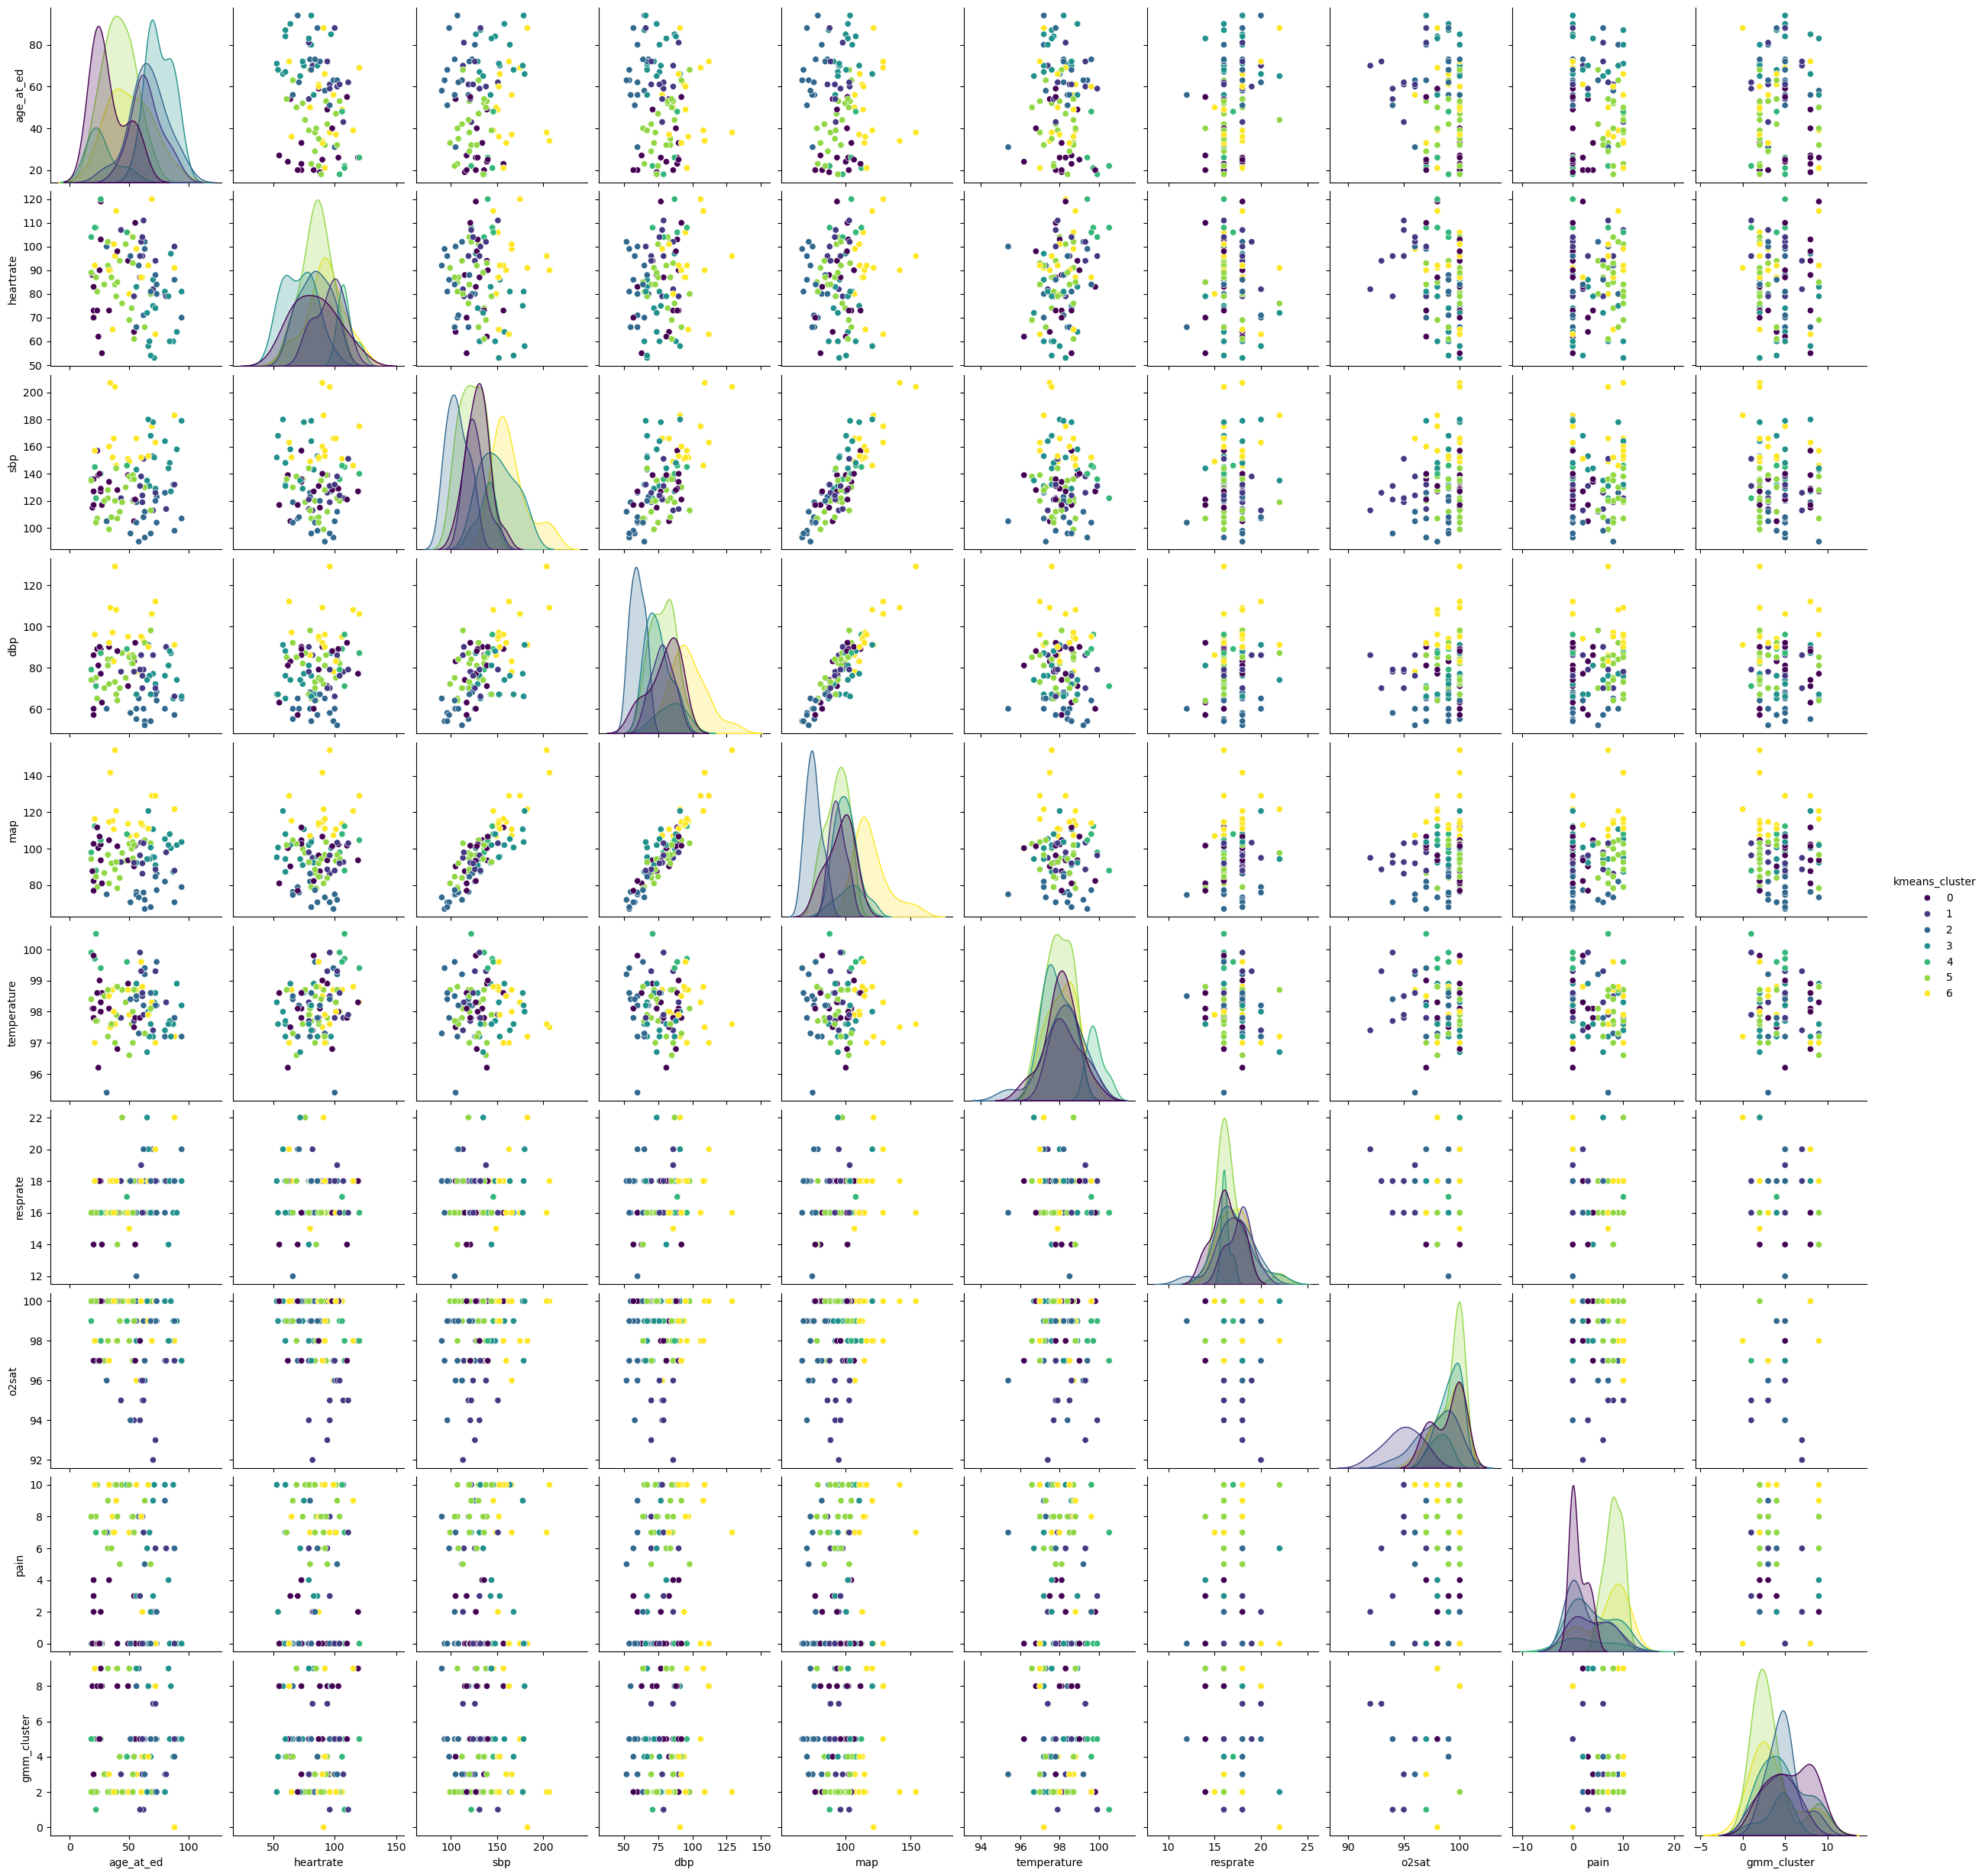

In [17]:
pairplot_data = sample_data.copy()
pairplot_data['gmm_cluster'] = gmm_labels
pairplot_data['kmeans_cluster'] = kmeans_labels
pairplot_data = pairplot_data.sample(100)
# pairplot of sample_df
sns.pairplot(pairplot_data, hue='gmm_cluster', palette='viridis')
plt.show()

# pairplot of sample_df
sns.pairplot(pairplot_data, hue='kmeans_cluster', palette='viridis')
plt.show()

In [ ]:
sample_data.info()

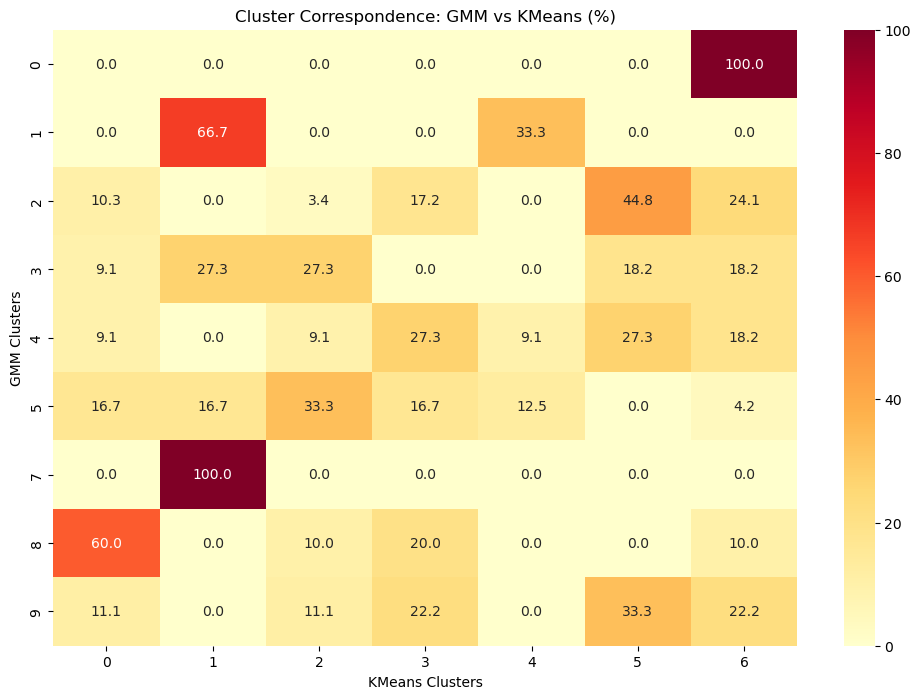


Adjusted Mutual Information Score: 0.137

Dominant cluster relationships:


In [19]:
# Create contingency table
contingency_table = pd.crosstab(
    pairplot_data['gmm_cluster'], 
    pairplot_data['kmeans_cluster'],
    normalize='index'  # Normalize by GMM clusters
) * 100

# Visualize the relationship
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, 
            annot=True, 
            fmt='.1f', 
            cmap='YlOrRd',
            vmin=0, 
            vmax=100)
plt.title('Cluster Correspondence: GMM vs KMeans (%)')
plt.xlabel('KMeans Clusters')
plt.ylabel('GMM Clusters')
plt.show()

# Calculate adjusted mutual information score
from sklearn.metrics import adjusted_mutual_info_score
ami_score = adjusted_mutual_info_score(
    pairplot_data['gmm_cluster'], 
    pairplot_data['kmeans_cluster']
)
print(f"\nAdjusted Mutual Information Score: {ami_score:.3f}")

# Print dominant relationships
print("\nDominant cluster relationships:")
for gmm_cluster in contingency_table.index:
    max_kmeans = contingency_table.loc[gmm_cluster].idxmax()
    max_percentage = contingency_table.loc[gmm_cluster, max_kmeans]

## playgorund

In [ ]:
# Calculate number of rows needed for the features
n_features = len(features_to_evaluate)
n_cols = 3  # Use 3 columns for better layout
n_rows = (n_features + n_cols - 1) // n_cols  # Calculate needed rows

# Create figure with appropriate size
plt.figure(figsize=(20, 5*n_rows))  # Wider figure to accommodate 3 columns

# For each feature
for i, feature in enumerate(features_to_evaluate):
    plt.subplot(n_rows, n_cols, i+1)
    
    if cleaned_data[feature].dtype in ['bool', 'object', 'category'] or cleaned_data[feature].nunique() < 10:
        # Bar plot for categorical/boolean features
        sns.countplot(data=cleaned_data, x=feature)
        if feature_evaluation.loc[feature].get('balance_ratio') is not None:
            plt.title(f'{feature}\nBalance Ratio: {feature_evaluation.loc[feature, "balance_ratio"]:.2f}')
        else:
            plt.title(feature)
    else:
        # Distribution plot for numerical features
        sns.histplot(data=cleaned_data, x=feature, kde=True)
        if 'distribution' in feature_evaluation.loc[feature] and 'skew' in feature_evaluation.loc[feature]['distribution']:
            plt.title(f'{feature}\nSkew: {feature_evaluation.loc[feature, "distribution"]["skew"]:.2f}')
        else:
            plt.title(feature)
    
    plt.xticks(rotation=45, ha='right')  # Rotate labels and align them properly

plt.tight_layout()
plt.show()

### Critical Issues
- ❗ `is_hypoxic` is extremely imbalanced (136:1 ratio)
  - Either use SMOTE/class weights
  - Or consider using raw `o2sat` values instead
  - Or create multiple severity thresholds instead of binary

### Data Quality
- 📊 Handle missing values (~4.6% across features)
  - Implement consistent imputation strategy
  - Verify if missingness is random or systematic

### Transformations Needed
- 📈 `shock_index` needs transformation (skew: 2.72)
  - Apply log transformation
  - Or consider binning into clinical categories
- 📊 `pulse_pressure` might benefit from light transformation (skew: 0.87)
- ✅ `map` looks good as-is (skew: 0.31)

### Next Steps
1. Decide on `is_hypoxic` strategy
2. Implement missing value handling
3. Apply transformations
4. Re-evaluate feature distributions after changes

In [ ]:
# Collinearity Analysis

# Import additional libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical features
numerical_features = ['age_at_ed', 'temperature', 'heartrate', 'resprate', 
                     'o2sat', 'sbp', 'dbp', 'map', 'pulse_pressure', 'shock_index']

# Prepare data with imputed values (using previous imputer)
X = pd.DataFrame(X_imputed, columns=numerical_features)

# 1. Correlation Matrix
correlation_matrix = X.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdBu', 
            center=0, 
            fmt='.2f',
            square=True)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# 2. VIF Analysis
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                       for i in range(X.shape[1])]
    return vif_data.sort_values('VIF', ascending=False)

vif_scores = calculate_vif(X)

# Print VIF scores
print("\nVariance Inflation Factors:")
print(vif_scores)

# 3. Identify Strong Correlations
print("\nStrong Correlations (|r| > 0.7):")
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i,j]) > 0.7:
            strong_correlations.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i,j]
            })

if strong_correlations:
    correlations_df = pd.DataFrame(strong_correlations)
    print(correlations_df.sort_values('Correlation', ascending=False))
else:
    print("No strong correlations found")

# 4. Summary of Collinearity Issues
print("\nCollinearity Analysis Summary:")
print("Features with high VIF (> 5):")
high_vif = vif_scores[vif_scores['VIF'] > 5]
if not high_vif.empty:
    print(high_vif)
else:
    print("No features with high VIF found")

# Recommendations based on findings
print("\nRecommendations:")
recommendations = []

# Add recommendations based on VIF
for _, row in vif_scores.iterrows():
    if row['VIF'] > 10:
        recommendations.append(f"Consider removing {row['Feature']} (VIF: {row['VIF']:.2f})")
    elif row['VIF'] > 5:
        recommendations.append(f"Monitor {row['Feature']} (VIF: {row['VIF']:.2f})")

# Add recommendations based on correlations
for corr in strong_correlations:
    recommendations.append(
        f"Consider choosing between {corr['Feature 1']} and {corr['Feature 2']} "
        f"(correlation: {corr['Correlation']:.2f})"
    )

if recommendations:
    for rec in recommendations:
        print(f"- {rec}")
else:
    print("No immediate collinearity concerns")

In [8]:
def create_pairplot(data, numerical_features, categorical_feature):
    sns.pairplot(data.sample(100)[numerical_features + [categorical_feature[0]]], 
                 hue=categorical_feature[0], 
                 kind='kde')
    plt.show()

### Feature Distribution Analysis

#### Issues & Analysis

##### Severe Class Imbalances (>100:1 ratio)
- Vital sign flags: is_hypoxic, is_hypotensive
- Oxygen categories: o2_category
- Impact: Potential model bias towards majority class

##### Moderate Imbalances (15-20:1 ratio)
- Clinical categories: hr_category, temp_category
- Vital flags: is_bradycardic, is_febrile
- Impact: Reduced model sensitivity to minority classes

##### Distribution Concerns
- shock_index: severe right skew (2.72)
- pulse_pressure: moderate right skew (0.87)
- Well-distributed features: map (0.31), age_group (1.87:1), pain_category (4.05:1)

#### Recommendations

##### 1. Feature Transformation
- Apply log transformation to shock_index
- Consider light transformation for pulse_pressure
- Maintain well-distributed features in current form

##### 2. Class Imbalance Mitigation
- Implement SMOTE or class weights for severe imbalances
- Convert binary flags to severity-based ordinal categories
- Use stratified sampling for moderate imbalances

##### 3. Validation & Review
- Validate transformations with clinical expertise
- Re-evaluate distributions after modifications
- Ensure clinical interpretability is maintained

In [ ]:
# PCA Analysis of Features

# Import necessary libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical features for PCA
numerical_features = ['age_at_ed', 'temperature', 'heartrate', 'resprate', 
                     'o2sat', 'sbp', 'dbp', 'map', 'pulse_pressure', 'shock_index']

# Prepare data
X = cleaned_data[numerical_features].copy()

# Handle missing values with median imputation
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)
X_imputed = pd.DataFrame(X_imputed, columns=numerical_features)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
X_scaled = pd.DataFrame(X_scaled, columns=numerical_features)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(X_scaled)

# Calculate explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Create DataFrame of feature loadings
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(numerical_features))],
    index=numerical_features
)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), 
         np.cumsum(explained_variance), 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

# Plot feature loadings heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(loadings, annot=True, cmap='RdBu', center=0, fmt='.2f')
plt.title('Feature Loadings (Correlations with Principal Components)')
plt.tight_layout()
plt.show()

# Print top contributing features for each PC
print("\nTop Contributing Features to Principal Components:")
for i in range(3):  # Show first 3 PCs
    pc = f'PC{i+1}'
    print(f"\n{pc}:")
    # Sort features by absolute loading values
    top_features = loadings[pc].abs().sort_values(ascending=False)
    for feat, load in top_features[:3].items():
        print(f"{feat}: {loadings[pc][feat]:.3f}")

# Print total variance explained by first 3 PCs
print("\nCumulative Variance Explained:")
cumulative_variance = np.cumsum(explained_variance)
for i in range(3):
    print(f"First {i+1} PCs: {cumulative_variance[i]:.3f}")
    

In [ ]:
sample_data = cleaned_data.sample(10000)

numerical_features = ['o2sat', 'sbp', 'dbp', 'map', 'pulse_pressure', 'shock_index']
categorical_feature = ['is_hypoxic']
create_pairplot(cleaned_data, numerical_features, categorical_feature)

In [ ]:
# Import necessary libraries
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import numpy as np


# Select numerical features for clustering
# Select numerical features for clustering
numerical_features = ['age_at_ed', 'temperature', 'heartrate', 'resprate', 
                     'o2sat', 'sbp', 'dbp']

# Sample data and prepare for clustering
sample_size = 10000
sampled_data = cleaned_data.sample(n=sample_size, random_state=42)

# Remove rows with NaN values
X = sampled_data[numerical_features].dropna()

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and fit GMM
n_components = 5  # You can adjust this number
gmm = GaussianMixture(n_components=n_components, 
                      random_state=42,
                      covariance_type='full',
                      n_init=10)
gmm.fit(X_scaled)

# Get cluster assignments for sampled data
clusters = gmm.predict(X_scaled)

# Create a new dataframe with only the complete cases and their cluster assignments
clustered_data = X.copy()
clustered_data['cluster'] = clusters

# Visualize results
plt.figure(figsize=(15, 6))

# Plot cluster sizes
plt.subplot(1, 2, 1)
cluster_sizes = clustered_data['cluster'].value_counts().sort_index()
plt.bar(cluster_sizes.index, cluster_sizes.values)
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')

# Plot BIC scores for different numbers of components
plt.subplot(1, 2, 2)
n_components_range = range(1, 11)
bic = []
for n in n_components_range:
    gmm_temp = GaussianMixture(n_components=n, random_state=42, n_init=10)
    gmm_temp.fit(X_scaled)
    bic.append(gmm_temp.bic(X_scaled))
    
plt.plot(n_components_range, bic, marker='o')
plt.title('BIC Score vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('BIC Score')

plt.tight_layout()
plt.show()

# Print cluster statistics
print("\nCluster Statistics:")
print(cluster_stats)

In [ ]:
from math import pi
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Radar Plot
# Prepare data
features = numerical_features
num_features = len(features)
angles = [n / float(num_features) * 2 * pi for n in range(num_features)]
angles += angles[:1]

# Normalize the data for better visualization
cluster_means = cluster_stats.xs('mean', axis=1, level=1)
scaler = StandardScaler()
normalized_means = pd.DataFrame(
    scaler.fit_transform(cluster_means),
    columns=cluster_means.columns,
    index=cluster_means.index
)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(projection='polar'))

# Plot data
for cluster in sorted(clustered_data['cluster'].unique()):
    values = normalized_means.loc[cluster].values.tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Cluster {cluster}')
    ax.fill(angles, values, alpha=0.1)

# Fix axis to go in the right order and start at 12 o'clock
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label
ax.set_xticks(angles[:-1])
ax.set_xticklabels(features, size=10)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title("Cluster Characteristics - Normalized Features", pad=20)
plt.tight_layout()
plt.show()

# 2. Box plots for each feature by cluster
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for idx, feature in enumerate(features):
    sns.boxplot(data=clustered_data, x='cluster', y=feature, ax=axes[idx])
    axes[idx].set_title(f'{feature} by Cluster')
    axes[idx].set_xlabel('Cluster')
    
plt.tight_layout()
plt.show()

# 3. Heatmap of cluster means
plt.figure(figsize=(12, 8))
# Convert cluster_means to numeric before plotting to avoid TypeError
cluster_means_numeric = cluster_means.applymap(lambda x: pd.to_numeric(x, errors='coerce'))
sns.heatmap(cluster_means_numeric, annot=True, fmt='.1f', cmap='YlOrRd', center=0)
plt.title('Cluster Characteristics Heatmap')
plt.ylabel('Cluster')
plt.show()


In [33]:
def calculate_feature_importance(X_scaled, labels, feature_names):
    """
    Calculate feature importance based on cluster separation.
    Higher F-statistic indicates better separation power.
    """
    from scipy import stats
    import pandas as pd
    
    # Initialize storage for F-statistics
    f_statistics = []
    p_values = []
    
    # Calculate F-statistic for each feature
    for i in range(X_scaled.shape[1]):
        f_stat, p_val = stats.f_oneway(*[
            X_scaled[labels == label, i] 
            for label in np.unique(labels)
        ])
        f_statistics.append(f_stat)
        p_values.append(p_val)
    
    # Create importance DataFrame
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'F_Statistic': f_statistics,
        'P_Value': p_values
    })
    
    # Sort by importance
    importance_df = importance_df.sort_values('F_Statistic', ascending=False)
    
    return importance_df

def feature_silhouette_importance(X_scaled, labels, feature_names):
    """
    Calculate feature importance based on silhouette scores
    for individual features.
    """
    from sklearn.metrics import silhouette_score
    import pandas as pd
    
    silhouette_scores = []
    
    # Calculate silhouette score for each feature individually
    for i in range(X_scaled.shape[1]):
        feature_score = silhouette_score(
            X_scaled[:, i].reshape(-1, 1),
            labels
        )
        silhouette_scores.append(feature_score)
    
    # Create importance DataFrame
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Silhouette_Score': silhouette_scores
    })
    
    # Sort by importance
    importance_df = importance_df.sort_values('Silhouette_Score', ascending=False)
    
    return importance_df

In [ ]:
# Using your existing clustering setup
numerical_features = ['age_at_ed', 'temperature', 'heartrate', 'resprate', 
                     'o2sat', 'sbp', 'dbp']

# Get feature importance using both methods
f_importance = calculate_feature_importance(X_scaled, clusters, numerical_features)
silhouette_importance = feature_silhouette_importance(X_scaled, clusters, numerical_features)

# Visualize results
plt.figure(figsize=(12, 5))

# F-statistic plot
plt.subplot(1, 2, 1)
sns.barplot(data=f_importance, x='Feature', y='F_Statistic')
plt.xticks(rotation=45)
plt.title('Feature Importance by F-statistic')

# Silhouette score plot
plt.subplot(1, 2, 2)
sns.barplot(data=silhouette_importance, x='Feature', y='Silhouette_Score')
plt.xticks(rotation=45)
plt.title('Feature Importance by Silhouette Score')

plt.tight_layout()
plt.show()

# Print detailed results
print("Feature Importance by F-statistic:")
print(f_importance)
print("\nFeature Importance by Silhouette Score:")
print(silhouette_importance)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import itertools
import numpy as np

def plot_cluster_circles_from_stats(cluster_stats, feature_names):
    # Create pairs of features
    feature_pairs = list(itertools.combinations(range(len(feature_names)), 2))
    
    # Calculate number of rows and columns needed
    n_pairs = len(feature_pairs)
    n_cols = 3  # You can adjust this
    n_rows = (n_pairs + n_cols - 1) // n_cols
    
    # Create figure
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.ravel()
    
    # Colors for clusters
    n_clusters = len(cluster_stats.index)
    colors = plt.cm.viridis(np.linspace(0, 1, n_clusters))
    
    # For each pair of features
    for idx, (i, j) in enumerate(feature_pairs):
        ax = axes[idx]
        
        feature_i = feature_names[i]
        feature_j = feature_names[j]
        
        # Plot circles for each cluster
        for k in range(n_clusters):
            # Get mean and std for these features
            mean_i = cluster_stats.iloc[k][f'{feature_i}']['mean']
            mean_j = cluster_stats.iloc[k][f'{feature_j}']['mean']
            std_i = cluster_stats.iloc[k][f'{feature_i}']['std']
            std_j = cluster_stats.iloc[k][f'{feature_j}']['std']
            
            # Create circle
            circle = patches.Ellipse((mean_i, mean_j), 
                                   width=2*std_i, 
                                   height=2*std_j,
                                   alpha=0.3,
                                   color=colors[k],
                                   label=f'Cluster {k}')
            ax.add_patch(circle)
            
            # Add cluster center
            ax.plot(mean_i, mean_j, 'o', 
                   color=colors[k], 
                   markersize=10,
                   markeredgecolor='black')
        
        # Set labels
        ax.set_xlabel(feature_i)
        ax.set_ylabel(feature_j)
        
        # Add legend to first plot only
        if idx == 0:
            ax.legend()
            
        # Set title
        ax.set_title(f'{feature_i} vs {feature_j}')
        
        # Make plot square
        ax.set_aspect('equal', adjustable='box')
    
    # Remove empty subplots
    for idx in range(len(feature_pairs), len(axes)):
        fig.delaxes(axes[idx])
    
    plt.tight_layout()
    plt.show()

# Define feature names
feature_names = ['age_at_ed', 'temperature', 'heartrate', 'resprate', 
                'o2sat', 'sbp', 'dbp', 'pain', 'acuity']

# Create visualization
plot_cluster_circles_from_stats(cluster_stats, feature_names)

# You might also want to see just a few key relationships
key_features = ['age_at_ed', 'heartrate', 'resprate', 'pain']
plot_cluster_circles_from_stats(cluster_stats, key_features)

In [ ]:
# Import necessary libraries
import hdbscan
from sklearn.preprocessing import StandardScaler
import numpy as np

# Select numerical features for clustering
numerical_features = ['age_at_ed', 'temperature', 'heartrate', 'resprate', 
                     'o2sat', 'sbp', 'dbp', 'pain', 'acuity']

# Sample data and prepare for clustering
sample_size = 10000
sampled_data = cleaned_data.sample(n=sample_size, random_state=42)
X = sampled_data[numerical_features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and fit HDBSCAN
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=50,  # Minimum size of clusters
    min_samples=5,        # Number of samples in neighborhood for core points
    metric='euclidean',
    cluster_selection_method='eom'  # 'eom' tends to produce more clusters than 'leaf'
)
clusters = clusterer.fit_predict(X_scaled)

# Add cluster labels to the sampled dataframe
sampled_data['cluster'] = clusters

# Visualize results
plt.figure(figsize=(15, 6))

# Plot cluster sizes
cluster_sizes = sampled_data['cluster'].value_counts().sort_index()
plt.bar(cluster_sizes.index, cluster_sizes.values)
plt.title('Cluster Sizes')
plt.xlabel('Cluster (-1 represents noise points)')
plt.ylabel('Number of Samples')
plt.tight_layout()
plt.show()

# Print cluster statistics
print("\nCluster Statistics:")
cluster_stats = sampled_data.groupby('cluster')[numerical_features].agg(['mean', 'std'])
print(cluster_stats)

# Optional: Plot feature distributions by cluster
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    for cluster in sorted(sampled_data['cluster'].unique()):
        cluster_data = sampled_data[sampled_data['cluster'] == cluster][feature]
        plt.hist(cluster_data, alpha=0.5, label=f'Cluster {cluster}', bins=30)
    plt.title(f'{feature} Distribution by Cluster')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend()
    plt.show()

In [ ]:
# Import necessary libraries
import hdbscan
from sklearn.preprocessing import StandardScaler
import numpy as np

# Select numerical features for clustering - removing ordinal variables
numerical_features = ['age_at_ed', 'temperature', 'heartrate', 'resprate', 
                     'o2sat', 'sbp', 'dbp']

# Sample data and prepare for clustering
sample_size = 10000
sampled_data = cleaned_data.sample(n=sample_size, random_state=42)
X = sampled_data[numerical_features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Try different HDBSCAN configurations
configs = [
    {'min_cluster_size': 100, 'min_samples': 5},
    {'min_cluster_size': 200, 'min_samples': 10},
    {'min_cluster_size': 50, 'min_samples': 2},
    {'min_cluster_size': 30, 'min_samples': 1}
]

for config in configs:
    # Initialize and fit HDBSCAN with current config
    clusterer = hdbscan.HDBSCAN(
        min_cluster_size=config['min_cluster_size'],
        min_samples=config['min_samples'],
        metric='euclidean',
        cluster_selection_method='eom',
        cluster_selection_epsilon=0.5  # More permissive cluster selection
    )
    clusters = clusterer.fit_predict(X_scaled)
    
    # Calculate noise percentage
    noise_percentage = (clusters == -1).mean() * 100
    
    # Plot cluster sizes
    plt.figure(figsize=(15, 6))
    cluster_sizes = pd.Series(clusters).value_counts().sort_index()
    plt.bar(cluster_sizes.index, cluster_sizes.values)
    plt.title(f'Cluster Sizes\nConfig: {config}\nNoise: {noise_percentage:.1f}%')
    plt.xlabel('Cluster (-1 represents noise points)')
    plt.ylabel('Number of Samples')
    plt.tight_layout()
    plt.show()
    
    if noise_percentage < 50:  # Only show detailed stats if we have reasonable clustering
        # Add cluster labels to a copy of sampled data
        temp_data = sampled_data.copy()
        temp_data['cluster'] = clusters
        
        # Print cluster statistics
        print(f"\nCluster Statistics for config {config}:")
        cluster_stats = temp_data.groupby('cluster')[numerical_features].agg(['mean', 'std'])
        print(cluster_stats)
        
        # Plot feature distributions for non-noise clusters
        for feature in numerical_features:
            plt.figure(figsize=(10, 6))
            for cluster in sorted(set(clusters[clusters != -1])):  # Skip noise cluster
                cluster_data = temp_data[temp_data['cluster'] == cluster][feature]
                plt.hist(cluster_data, alpha=0.5, label=f'Cluster {cluster}', bins=30)
            plt.title(f'{feature} Distribution by Cluster\nConfig: {config}')
            plt.xlabel(feature)
            plt.ylabel('Count')
            plt.legend()
            plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Select numerical features for clustering
numerical_features = ['age_at_ed', 'temperature', 'heartrate', 'resprate', 
                     'o2sat', 'sbp', 'dbp']

# Sample data and prepare for clustering
sample_size = 10000
sampled_data = cleaned_data.sample(n=sample_size, random_state=42)
X = sampled_data[numerical_features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Try different numbers of clusters
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, clusters)
    silhouette_scores.append(score)
    
# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

# Use optimal k from silhouette analysis
optimal_k = k_range[np.argmax(silhouette_scores)]
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the sampled dataframe
sampled_data['cluster'] = clusters

# Plot cluster sizes
plt.figure(figsize=(15, 6))
cluster_sizes = sampled_data['cluster'].value_counts().sort_index()
plt.bar(cluster_sizes.index, cluster_sizes.values)
plt.title(f'Cluster Sizes (k={optimal_k})')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')
plt.show()

# Print cluster statistics
print("\nCluster Statistics:")
cluster_stats = sampled_data.groupby('cluster')[numerical_features].agg(['mean', 'std'])
print(cluster_stats)

# Plot feature distributions by cluster
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    for cluster in sorted(sampled_data['cluster'].unique()):
        cluster_data = sampled_data[sampled_data['cluster'] == cluster][feature]
        plt.hist(cluster_data, alpha=0.5, label=f'Cluster {cluster}', bins=30)
    plt.title(f'{feature} Distribution by Cluster')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend()
    plt.show()

# Analyze how clusters relate to acuity
print("\nAcuity Distribution by Cluster:")
acuity_dist = pd.crosstab(sampled_data['cluster'], sampled_data['acuity'], normalize='index') * 100
print(acuity_dist)

# Visualize cluster centers
cluster_centers = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=numerical_features
)
print("\nCluster Centers (Original Scale):")
print(cluster_centers)

In [ ]:
# Use the same sampled data and scaled features from previous analysis
# Try different numbers of components and covariance types
n_components_range = range(2, 11)
covariance_types = ['full', 'tied', 'diag', 'spherical']

# Initialize storage for BIC and AIC scores
bic_scores = np.zeros((len(covariance_types), len(n_components_range)))
aic_scores = np.zeros((len(covariance_types), len(n_components_range)))

# Compute scores for each combination
for i, cv_type in enumerate(covariance_types):
    for j, n_comp in enumerate(n_components_range):
        gmm = GaussianMixture(
            n_components=n_comp,
            covariance_type=cv_type,
            random_state=42,
            n_init=10
        )
        gmm.fit(X_scaled)
        bic_scores[i, j] = gmm.bic(X_scaled)
        aic_scores[i, j] = gmm.aic(X_scaled)

# Plot BIC and AIC scores
plt.figure(figsize=(15, 6))

# BIC plot
plt.subplot(1, 2, 1)
for i, cv_type in enumerate(covariance_types):
    plt.plot(n_components_range, bic_scores[i], label=cv_type, marker='o')
plt.xlabel('Number of components')
plt.ylabel('BIC score')
plt.title('BIC Score vs. Number of Components')
plt.legend()

# AIC plot
plt.subplot(1, 2, 2)
for i, cv_type in enumerate(covariance_types):
    plt.plot(n_components_range, aic_scores[i], label=cv_type, marker='o')
plt.xlabel('Number of components')
plt.ylabel('AIC score')
plt.title('AIC Score vs. Number of Components')
plt.legend()

plt.tight_layout()
plt.show()

# Find optimal parameters
best_bic_idx = np.unravel_index(bic_scores.argmin(), bic_scores.shape)
best_cv_type = covariance_types[best_bic_idx[0]]
best_n_components = n_components_range[best_bic_idx[1]]

print(f"\nOptimal parameters based on BIC:")
print(f"Covariance type: {best_cv_type}")
print(f"Number of components: {best_n_components}")

# Fit optimal GMM
optimal_gmm = GaussianMixture(
    n_components=best_n_components,
    covariance_type=best_cv_type,
    random_state=42,
    n_init=10
)
clusters = optimal_gmm.fit_predict(X_scaled)

# Add cluster labels to the sampled dataframe
sampled_data['cluster'] = clusters

# Plot cluster sizes
plt.figure(figsize=(15, 6))
cluster_sizes = sampled_data['cluster'].value_counts().sort_index()
plt.bar(cluster_sizes.index, cluster_sizes.values)
plt.title(f'GMM Cluster Sizes (n={best_n_components}, covariance={best_cv_type})')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')
plt.show()

# Print cluster statistics
print("\nCluster Statistics:")
cluster_stats = sampled_data.groupby('cluster')[numerical_features].agg(['mean', 'std'])
print(cluster_stats)

# Plot feature distributions by cluster
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    for cluster in sorted(sampled_data['cluster'].unique()):
        cluster_data = sampled_data[sampled_data['cluster'] == cluster][feature]
        plt.hist(cluster_data, alpha=0.5, label=f'Cluster {cluster}', bins=30)
    plt.title(f'{feature} Distribution by Cluster')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend()
    plt.show()

# Analyze cluster probabilities
cluster_probs = optimal_gmm.predict_proba(X_scaled)
avg_prob = np.mean(np.max(cluster_probs, axis=1))
print(f"\nAverage probability of cluster assignment: {avg_prob:.3f}")

# Analyze how clusters relate to acuity
print("\nAcuity Distribution by Cluster:")
acuity_dist = pd.crosstab(sampled_data['cluster'], sampled_data['acuity'], normalize='index') * 100
print(acuity_dist)

# Get cluster centers
cluster_centers = pd.DataFrame(
    scaler.inverse_transform(optimal_gmm.means_),
    columns=numerical_features
)
print("\nCluster Centers (Original Scale):")
print(cluster_centers)